In [1]:
!nvidia-smi

Sun May 11 09:51:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/Bytetrack-directionestimation
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/Bytetrack-directionestimation
 CITATION.cff		  siv8m1.pt
 CONTRIBUTING.md	  siv8m2.pt
'direction tracking.py'   siv8m3.pt
 docker			  siv8m4.pt
 docs			  siv8m5.pt
 examples		  test
 LICENSE		  tests
 MANIFEST.in		  ultralytics
 mkdocs.yml		 'yolov8 Bytetrack-new.py'
 NYINYIMYO.txt		 'yolov8 Bytetrack-new - realtime-logs.py'
 README.md		 'yolov8 Bytetrack-new - realtime.py'
 README.zh-CN.md	  yolov8m-seg.pt
 requirements.txt	  yolov8n.pt
 setup.cfg		  yolov8-SI-track.ipynb
 setup.py


In [3]:
%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.93 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [4]:
from ultralytics import YOLO

In [6]:
# Save the original torch.load function
_original_torch_load = torch.load

# Define a new function that forces weights_only=False
def custom_torch_load(*args, **kwargs):
    if "weights_only" not in kwargs:
        kwargs["weights_only"] = False
    return _original_torch_load(*args, **kwargs)

# Override torch.load globally
torch.load = custom_torch_load

In [7]:
model = YOLO("siv8m3.pt")
model.predict(source="test/images", conf=0.164, save=True)


image 1/2 /content/gdrive/MyDrive/Bytetrack-directionestimation/test/images/test1.jpg: 256x416 3 Instruments, 84.1ms
image 2/2 /content/gdrive/MyDrive/Bytetrack-directionestimation/test/images/test2.jpg: 256x416 2 Instruments, 19.1ms
Speed: 6.2ms preprocess, 51.6ms inference, 182.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/segment/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'Instrument'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
        

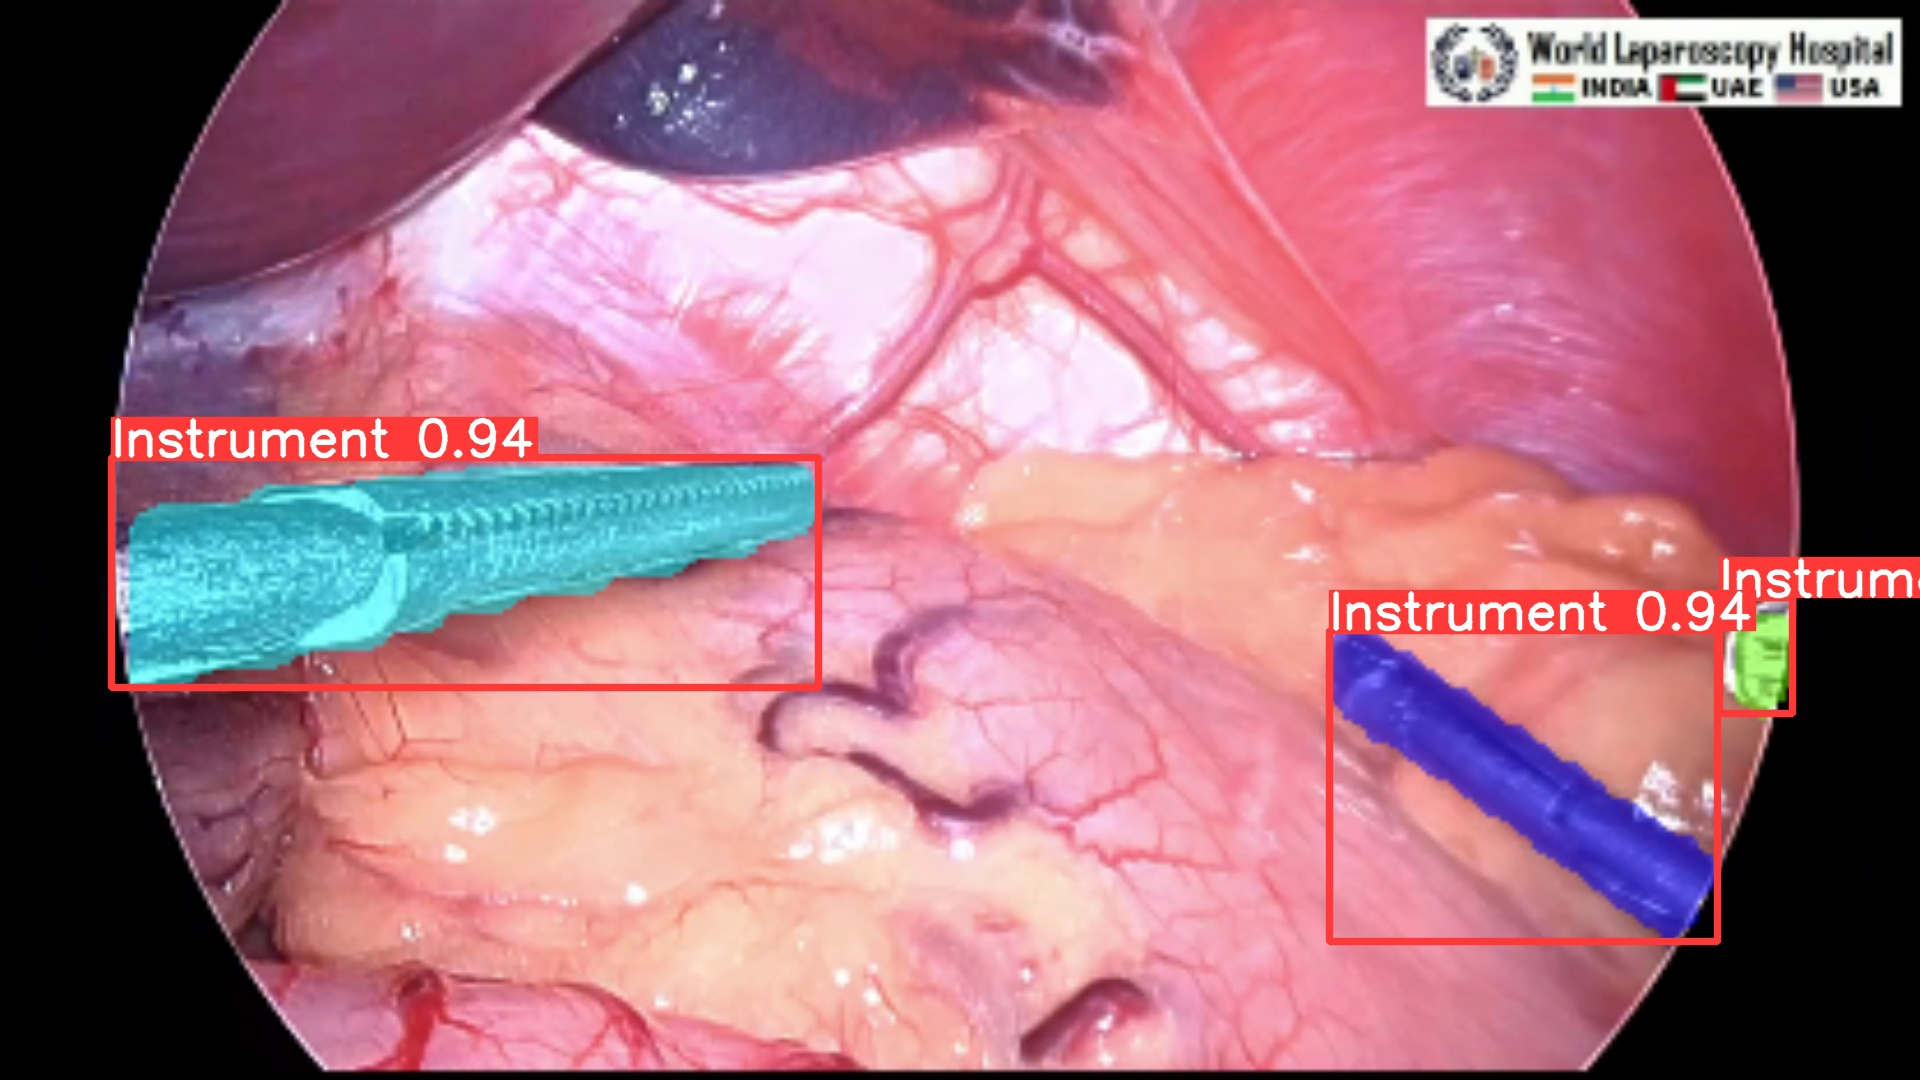

In [9]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/test1.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [11]:
%pip install lap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.8 MB/s eta 0:00:00


In [12]:
model = YOLO("siv8m3.pt")
results = model.track(source="test/SI-Tracking.mp4", conf=0.164, stream=True, save=True, tracker="bytetrack.yaml")
for r in results:
  pass


video 1/1 (1/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.1ms
video 1/1 (2/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (3/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     121.45      352.94      905.12      689.93           0]
 [      198.2      77.405      957.55      214.59           1]]
det_2nd =  []
New det =  [     121.45      352.94      905.12      689.93           0           1]
New det =  [      198.2      77.405      957.55      214.59           1           2]
detwithid =  [[np.float64(121.453857421875), np.float64(352.9383850097656), np.float64(905.1182250976562), np.float64(689.9287109375), np.float64(0.0), np.float64(1.0)], [np.float64(198.1969451904297), np.float64(77.4054946899414), np.float64(957.545654296875), np.float64(214.59329223632812), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(121.453857421875), np.float64(352.9383850097656), np.float64(905.1182250976562), np.float64(689.9287109375), 1, np.float32(0.9595628), np.float32(0.0), np.float64(0.0)], [np.float64(198.1969451904297), np.float64(77.4054946899414), np.float64(957.545654296875), np.float64(214.59329223632812), 2, np.float32(0.9374087), np.float32

video 1/1 (4/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (5/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (6/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.2ms


det =  [[     121.03      350.79       908.7      687.85           0]
 [     197.34      77.696       958.7      214.29           1]]
det_2nd =  []
Point 3  box =  [121, 350, 908, 687, np.float64(0.0)]
Point 3  box =  [199, 77, 960, 213, np.float64(1.0)]
detwithid =  [[np.float64(121.02665710449219), np.float64(350.7914123535156), np.float64(908.6980590820312), np.float64(687.8508911132812), np.float64(0.0), np.float64(1.0)], [np.float64(197.33868408203125), np.float64(77.69622802734375), np.float64(958.7033081054688), np.float64(214.29290771484375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(121.02665710449219), np.float64(350.7914123535156), np.float64(908.6980590820312), np.float64(687.8508911132812), 1, np.float32(0.95930535), np.float32(0.0), np.float64(0.0)], [np.float64(197.33868408203125), np.float64(77.69622802734375), np.float64(958.7033081054688), np.float64(214.29290771484375), 2, np.float32(0.93789786), np.float32(0.0), np.float64(1.0)]]
det =  [[     121.25

video 1/1 (7/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 22.6ms
video 1/1 (8/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.1ms
video 1/1 (9/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (10/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (11/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     120.84      337.91      921.91      687.44           0]
 [     195.12      84.493      958.97      218.42           1]]
det_2nd =  []
Point 3  box =  [116, 331, 917, 680, np.float64(0.0)]
Point 3  box =  [196, 83, 959, 216, np.float64(1.0)]
detwithid =  [[np.float64(120.8379898071289), np.float64(337.91387939453125), np.float64(921.9078979492188), np.float64(687.4385375976562), np.float64(0.0), np.float64(1.0)], [np.float64(195.1168975830078), np.float64(84.49269104003906), np.float64(958.96728515625), np.float64(218.4204559326172), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(120.8379898071289), np.float64(337.91387939453125), np.float64(921.9078979492188), np.float64(687.4385375976562), 1, np.float32(0.95679957), np.float32(0.0), np.float64(0.0)], [np.float64(195.1168975830078), np.float64(84.49269104003906), np.float64(958.96728515625), np.float64(218.4204559326172), 2, np.float32(0.9269148), np.float32(0.0), np.float64(1.0)]]
det =  [[     120.96      337

video 1/1 (12/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.3ms
video 1/1 (13/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (14/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     120.12      324.87      914.96      677.79           0]
 [     194.49       88.86      953.12      220.56           1]]
det_2nd =  []
Point 3  box =  [111, 308, 905, 660, np.float64(0.0)]
Point 3  box =  [191, 90, 949, 221, np.float64(1.0)]
detwithid =  [[np.float64(120.12274932861328), np.float64(324.8719177246094), np.float64(914.960205078125), np.float64(677.7875366210938), np.float64(0.0), np.float64(1.0)], [np.float64(194.49032592773438), np.float64(88.86038208007812), np.float64(953.1179809570312), np.float64(220.56155395507812), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(120.12274932861328), np.float64(324.8719177246094), np.float64(914.960205078125), np.float64(677.7875366210938), 1, np.float32(0.9547664), np.float32(0.0), np.float64(0.0)], [np.float64(194.49032592773438), np.float64(88.86038208007812), np.float64(953.1179809570312), np.float64(220.56155395507812), 2, np.float32(0.92227364), np.float32(0.0), np.float64(1.0)]]
det =  [[     120.74   

video 1/1 (15/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (16/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (17/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (18/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (19/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.72         326      893.85      663.67           0]
 [     193.04      88.266      950.52       219.4           1]]
det_2nd =  []
Point 3  box =  [120, 318, 894, 655, np.float64(0.0)]
Point 3  box =  [191, 90, 948, 221, np.float64(1.0)]
detwithid =  [[np.float64(119.71660614013672), np.float64(326.00335693359375), np.float64(893.8468017578125), np.float64(663.6709594726562), np.float64(0.0), np.float64(1.0)], [np.float64(193.03619384765625), np.float64(88.26602935791016), np.float64(950.52490234375), np.float64(219.40049743652344), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.71660614013672), np.float64(326.00335693359375), np.float64(893.8468017578125), np.float64(663.6709594726562), 1, np.float32(0.9568726), np.float32(0.0), np.float64(0.0)], [np.float64(193.03619384765625), np.float64(88.26602935791016), np.float64(950.52490234375), np.float64(219.40049743652344), 2, np.float32(0.9240127), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.75    

video 1/1 (20/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (21/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (22/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (23/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.04      314.93       862.1      655.11           0]
 [     194.69      84.642       948.3      216.36           1]]
det_2nd =  []
Point 3  box =  [148, 295, 891, 635, np.float64(0.0)]
Point 3  box =  [189, 84, 942, 215, np.float64(1.0)]
detwithid =  [[np.float64(119.04348754882812), np.float64(314.9302062988281), np.float64(862.0986938476562), np.float64(655.1088256835938), np.float64(0.0), np.float64(1.0)], [np.float64(194.69097900390625), np.float64(84.64191436767578), np.float64(948.301513671875), np.float64(216.35658264160156), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.04348754882812), np.float64(314.9302062988281), np.float64(862.0986938476562), np.float64(655.1088256835938), 1, np.float32(0.9608145), np.float32(0.0), np.float64(0.0)], [np.float64(194.69097900390625), np.float64(84.64191436767578), np.float64(948.301513671875), np.float64(216.35658264160156), 2, np.float32(0.92891574), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.71   

video 1/1 (24/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (25/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (26/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.5ms


det =  [[     119.58      308.89      891.03      648.93           0]
 [     194.06      88.222      938.69      221.17           1]]
det_2nd =  []
Point 3  box =  [142, 300, 913, 640, np.float64(0.0)]
Point 3  box =  [194, 87, 938, 219, np.float64(1.0)]
detwithid =  [[np.float64(119.57927703857422), np.float64(308.8948974609375), np.float64(891.0264282226562), np.float64(648.9317626953125), np.float64(0.0), np.float64(1.0)], [np.float64(194.05560302734375), np.float64(88.22187042236328), np.float64(938.6885986328125), np.float64(221.16622924804688), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.57927703857422), np.float64(308.8948974609375), np.float64(891.0264282226562), np.float64(648.9317626953125), 1, np.float32(0.95856506), np.float32(0.0), np.float64(0.0)], [np.float64(194.05560302734375), np.float64(88.22187042236328), np.float64(938.6885986328125), np.float64(221.16622924804688), 2, np.float32(0.92205244), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.58

video 1/1 (27/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (28/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (29/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (30/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (31/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.48       283.7      928.84      639.86           0]
 [     194.38      84.393      932.65      218.64           1]]
det_2nd =  []
Point 3  box =  [123, 287, 932, 643, np.float64(0.0)]
Point 3  box =  [198, 87, 936, 221, np.float64(1.0)]
detwithid =  [[np.float64(119.47723388671875), np.float64(283.7047424316406), np.float64(928.84326171875), np.float64(639.8619995117188), np.float64(0.0), np.float64(1.0)], [np.float64(194.3797607421875), np.float64(84.39266204833984), np.float64(932.6488647460938), np.float64(218.6416778564453), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.47723388671875), np.float64(283.7047424316406), np.float64(928.84326171875), np.float64(639.8619995117188), 1, np.float32(0.95649713), np.float32(0.0), np.float64(0.0)], [np.float64(194.3797607421875), np.float64(84.39266204833984), np.float64(932.6488647460938), np.float64(218.6416778564453), 2, np.float32(0.92946976), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.49      28

video 1/1 (32/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.1ms
video 1/1 (33/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (34/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (35/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.97      274.34      947.73      635.55           0]
 [     196.57      78.743      942.32      214.15           1]]
det_2nd =  []
Point 3  box =  [132, 272, 959, 633, np.float64(0.0)]
Point 3  box =  [206, 75, 951, 210, np.float64(1.0)]
detwithid =  [[np.float64(119.9664077758789), np.float64(274.34326171875), np.float64(947.733642578125), np.float64(635.5459594726562), np.float64(0.0), np.float64(1.0)], [np.float64(196.56991577148438), np.float64(78.74333190917969), np.float64(942.3248291015625), np.float64(214.1512451171875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.9664077758789), np.float64(274.34326171875), np.float64(947.733642578125), np.float64(635.5459594726562), 1, np.float32(0.9563051), np.float32(0.0), np.float64(0.0)], [np.float64(196.56991577148438), np.float64(78.74333190917969), np.float64(942.3248291015625), np.float64(214.1512451171875), 2, np.float32(0.93701154), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.17      275.4

video 1/1 (36/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (37/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (38/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.34      277.26      959.93      641.74           0]
 [     196.55      79.183      947.55      215.12           1]]
det_2nd =  []
Point 3  box =  [125, 270, 965, 634, np.float64(0.0)]
Point 3  box =  [203, 74, 953, 209, np.float64(1.0)]
detwithid =  [[np.float64(119.34363555908203), np.float64(277.2562561035156), np.float64(959.9313354492188), np.float64(641.74365234375), np.float64(0.0), np.float64(1.0)], [np.float64(196.5485076904297), np.float64(79.18291473388672), np.float64(947.54541015625), np.float64(215.11990356445312), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.34363555908203), np.float64(277.2562561035156), np.float64(959.9313354492188), np.float64(641.74365234375), 1, np.float32(0.9579254), np.float32(0.0), np.float64(0.0)], [np.float64(196.5485076904297), np.float64(79.18291473388672), np.float64(947.54541015625), np.float64(215.11990356445312), 2, np.float32(0.9347134), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.22      279.92

video 1/1 (39/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (40/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (41/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.0ms
video 1/1 (42/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.6ms
video 1/1 (43/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[        119      307.09      893.85      634.01           0]
 [     198.18      76.918      938.29      213.38           1]]
det_2nd =  []
Point 3  box =  [101, 309, 875, 635, np.float64(0.0)]
Point 3  box =  [203, 69, 943, 205, np.float64(1.0)]
detwithid =  [[np.float64(118.99756622314453), np.float64(307.0878601074219), np.float64(893.849609375), np.float64(634.009521484375), np.float64(0.0), np.float64(1.0)], [np.float64(198.17919921875), np.float64(76.9179916381836), np.float64(938.2916259765625), np.float64(213.37791442871094), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.99756622314453), np.float64(307.0878601074219), np.float64(893.849609375), np.float64(634.009521484375), 1, np.float32(0.9541432), np.float32(0.0), np.float64(0.0)], [np.float64(198.17919921875), np.float64(76.9179916381836), np.float64(938.2916259765625), np.float64(213.37791442871094), 2, np.float32(0.9401614), np.float32(0.0), np.float64(1.0)]]
det =  [[        119      307.12      89

video 1/1 (44/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms
video 1/1 (45/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (46/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (47/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     118.84      313.17      864.09      635.23           0]
 [     198.25      75.226      940.47      213.83           1]]
det_2nd =  []
Point 3  box =  [83, 318, 828, 640, np.float64(0.0)]
Point 3  box =  [202, 65, 944, 203, np.float64(1.0)]
detwithid =  [[np.float64(118.84051513671875), np.float64(313.1733093261719), np.float64(864.0897827148438), np.float64(635.2344360351562), np.float64(0.0), np.float64(1.0)], [np.float64(198.2495574951172), np.float64(75.22561645507812), np.float64(940.470947265625), np.float64(213.8294677734375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.84051513671875), np.float64(313.1733093261719), np.float64(864.0897827148438), np.float64(635.2344360351562), 1, np.float32(0.9551877), np.float32(0.0), np.float64(0.0)], [np.float64(198.2495574951172), np.float64(75.22561645507812), np.float64(940.470947265625), np.float64(213.8294677734375), 2, np.float32(0.9394342), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.91      313

video 1/1 (48/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.6ms
video 1/1 (49/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (50/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (51/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[      119.4      319.78      873.33      638.69           0]
 [      198.1      76.147       942.5      215.53           1]]
det_2nd =  []
Point 3  box =  [82, 328, 835, 646, np.float64(0.0)]
Point 3  box =  [205, 66, 949, 205, np.float64(1.0)]
detwithid =  [[np.float64(119.39898681640625), np.float64(319.775390625), np.float64(873.3319702148438), np.float64(638.6920776367188), np.float64(0.0), np.float64(1.0)], [np.float64(198.0975799560547), np.float64(76.14653778076172), np.float64(942.495361328125), np.float64(215.5304412841797), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.39898681640625), np.float64(319.775390625), np.float64(873.3319702148438), np.float64(638.6920776367188), 1, np.float32(0.9556261), np.float32(0.0), np.float64(0.0)], [np.float64(198.0975799560547), np.float64(76.14653778076172), np.float64(942.495361328125), np.float64(215.5304412841797), 2, np.float32(0.93650985), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.26      319.81    

video 1/1 (52/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (53/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.6ms
video 1/1 (54/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (55/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.03      318.94      874.78      637.71           0]
 [     197.83       76.29      943.95      214.97           1]]
det_2nd =  []
Point 3  box =  [81, 326, 836, 644, np.float64(0.0)]
Point 3  box =  [207, 67, 953, 205, np.float64(1.0)]
detwithid =  [[np.float64(119.03277587890625), np.float64(318.93548583984375), np.float64(874.7781982421875), np.float64(637.708740234375), np.float64(0.0), np.float64(1.0)], [np.float64(197.8295440673828), np.float64(76.2899169921875), np.float64(943.9527587890625), np.float64(214.9725799560547), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.03277587890625), np.float64(318.93548583984375), np.float64(874.7781982421875), np.float64(637.708740234375), 1, np.float32(0.9552158), np.float32(0.0), np.float64(0.0)], [np.float64(197.8295440673828), np.float64(76.2899169921875), np.float64(943.9527587890625), np.float64(214.9725799560547), 2, np.float32(0.9370233), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.82      315

video 1/1 (56/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (57/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (58/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.05      316.96      877.88       635.6           0]
 [     199.52        74.5      943.02      213.81           1]]
det_2nd =  []
Point 3  box =  [79, 326, 837, 644, np.float64(0.0)]
Point 3  box =  [209, 67, 952, 206, np.float64(1.0)]
detwithid =  [[np.float64(119.05461120605469), np.float64(316.9552001953125), np.float64(877.8842163085938), np.float64(635.6036376953125), np.float64(0.0), np.float64(1.0)], [np.float64(199.52206420898438), np.float64(74.5001220703125), np.float64(943.0194702148438), np.float64(213.81158447265625), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.05461120605469), np.float64(316.9552001953125), np.float64(877.8842163085938), np.float64(635.6036376953125), 1, np.float32(0.95418936), np.float32(0.0), np.float64(0.0)], [np.float64(199.52206420898438), np.float64(74.5001220703125), np.float64(943.0194702148438), np.float64(213.81158447265625), 2, np.float32(0.93947035), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.07   

video 1/1 (59/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (60/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (61/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 25.9ms
video 1/1 (62/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.51      305.46      896.55      640.74           0]
 [     200.65      71.593      941.92      210.26           1]]
det_2nd =  []
Point 3  box =  [88, 314, 865, 649, np.float64(0.0)]
Point 3  box =  [209, 59, 950, 197, np.float64(1.0)]
detwithid =  [[np.float64(119.50871276855469), np.float64(305.459228515625), np.float64(896.5538330078125), np.float64(640.7448120117188), np.float64(0.0), np.float64(1.0)], [np.float64(200.64710998535156), np.float64(71.59349822998047), np.float64(941.9177856445312), np.float64(210.26307678222656), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.50871276855469), np.float64(305.459228515625), np.float64(896.5538330078125), np.float64(640.7448120117188), 1, np.float32(0.95837426), np.float32(0.0), np.float64(0.0)], [np.float64(200.64710998535156), np.float64(71.59349822998047), np.float64(941.9177856445312), np.float64(210.26307678222656), 2, np.float32(0.94645375), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.49   

video 1/1 (63/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (64/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (65/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 22.0ms
video 1/1 (66/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.6ms


det =  [[     119.59       303.3      905.98      641.69           0]
 [      200.3      69.303      941.09      208.99           1]]
det_2nd =  []
Point 3  box =  [90, 312, 876, 650, np.float64(0.0)]
Point 3  box =  [207, 58, 947, 197, np.float64(1.0)]
detwithid =  [[np.float64(119.59209442138672), np.float64(303.3034362792969), np.float64(905.9837646484375), np.float64(641.6915893554688), np.float64(0.0), np.float64(1.0)], [np.float64(200.3021697998047), np.float64(69.30330657958984), np.float64(941.0889892578125), np.float64(208.98731994628906), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.59209442138672), np.float64(303.3034362792969), np.float64(905.9837646484375), np.float64(641.6915893554688), 1, np.float32(0.9588057), np.float32(0.0), np.float64(0.0)], [np.float64(200.3021697998047), np.float64(69.30330657958984), np.float64(941.0889892578125), np.float64(208.98731994628906), 2, np.float32(0.94780135), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.17    

video 1/1 (67/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms
video 1/1 (68/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (69/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.6ms


det =  [[     119.24      299.12      903.68      637.27           0]
 [     201.53       65.69      936.42      205.82           1]]
det_2nd =  []
Point 3  box =  [147, 286, 931, 624, np.float64(0.0)]
Point 3  box =  [192, 73, 926, 213, np.float64(1.0)]
detwithid =  [[np.float64(119.24229431152344), np.float64(299.11517333984375), np.float64(903.675537109375), np.float64(637.2687377929688), np.float64(0.0), np.float64(1.0)], [np.float64(201.5277099609375), np.float64(65.69033813476562), np.float64(936.4201049804688), np.float64(205.82225036621094), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.24229431152344), np.float64(299.11517333984375), np.float64(903.675537109375), np.float64(637.2687377929688), 1, np.float32(0.95757806), np.float32(0.0), np.float64(0.0)], [np.float64(201.5277099609375), np.float64(65.69033813476562), np.float64(936.4201049804688), np.float64(205.82225036621094), 2, np.float32(0.9495499), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.21   

video 1/1 (70/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (71/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.16      299.96      907.53      636.86           0]
 [      201.5      68.187         941      209.92           1]]
det_2nd =  []
Point 3  box =  [93, 313, 881, 649, np.float64(0.0)]
Point 3  box =  [213, 64, 952, 205, np.float64(1.0)]
detwithid =  [[np.float64(119.16468811035156), np.float64(299.9562072753906), np.float64(907.5263061523438), np.float64(636.8576049804688), np.float64(0.0), np.float64(1.0)], [np.float64(201.49679565429688), np.float64(68.1868896484375), np.float64(941.0029907226562), np.float64(209.91921997070312), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.16468811035156), np.float64(299.9562072753906), np.float64(907.5263061523438), np.float64(636.8576049804688), 1, np.float32(0.9564217), np.float32(0.0), np.float64(0.0)], [np.float64(201.49679565429688), np.float64(68.1868896484375), np.float64(941.0029907226562), np.float64(209.91921997070312), 2, np.float32(0.9484966), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.17     

video 1/1 (72/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.7ms
video 1/1 (73/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms
video 1/1 (74/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (75/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.8ms


det =  [[     118.61       292.7      921.92      633.98           0]
 [     201.21      68.476      943.14         210           1]]
det_2nd =  []
Point 3  box =  [147, 275, 950, 616, np.float64(0.0)]
Point 3  box =  [190, 73, 931, 214, np.float64(1.0)]
detwithid =  [[np.float64(118.61262512207031), np.float64(292.7021179199219), np.float64(921.9197998046875), np.float64(633.9813842773438), np.float64(0.0), np.float64(1.0)], [np.float64(201.2109375), np.float64(68.47613525390625), np.float64(943.1351318359375), np.float64(210.00341796875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.61262512207031), np.float64(292.7021179199219), np.float64(921.9197998046875), np.float64(633.9813842773438), 1, np.float32(0.956439), np.float32(0.0), np.float64(0.0)], [np.float64(201.2109375), np.float64(68.47613525390625), np.float64(943.1351318359375), np.float64(210.00341796875), 2, np.float32(0.947594), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.59      292.74      921.96

video 1/1 (76/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (77/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (78/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     118.57      292.89      921.81      634.14           0]
 [     200.92      68.564      942.84      209.98           1]]
det_2nd =  []
Point 3  box =  [90, 310, 893, 651, np.float64(0.0)]
Point 3  box =  [210, 64, 951, 205, np.float64(1.0)]
detwithid =  [[np.float64(118.56698608398438), np.float64(292.885009765625), np.float64(921.8116455078125), np.float64(634.140869140625), np.float64(0.0), np.float64(1.0)], [np.float64(200.91993713378906), np.float64(68.5635757446289), np.float64(942.8424682617188), np.float64(209.98399353027344), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.56698608398438), np.float64(292.885009765625), np.float64(921.8116455078125), np.float64(634.140869140625), 1, np.float32(0.9565163), np.float32(0.0), np.float64(0.0)], [np.float64(200.91993713378906), np.float64(68.5635757446289), np.float64(942.8424682617188), np.float64(209.98399353027344), 2, np.float32(0.9475691), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.47       29

video 1/1 (79/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (80/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.3ms
video 1/1 (81/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms


det =  [[     118.45      291.52      926.09      633.07           0]
 [     200.88      68.856      940.58      211.68           1]]
det_2nd =  []
Point 3  box =  [148, 273, 955, 614, np.float64(0.0)]
Point 3  box =  [191, 72, 930, 214, np.float64(1.0)]
detwithid =  [[np.float64(118.44796752929688), np.float64(291.5205993652344), np.float64(926.0883178710938), np.float64(633.0716552734375), np.float64(0.0), np.float64(1.0)], [np.float64(200.8824005126953), np.float64(68.85599517822266), np.float64(940.5845336914062), np.float64(211.684814453125), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.44796752929688), np.float64(291.5205993652344), np.float64(926.0883178710938), np.float64(633.0716552734375), 1, np.float32(0.9560775), np.float32(0.0), np.float64(0.0)], [np.float64(200.8824005126953), np.float64(68.85599517822266), np.float64(940.5845336914062), np.float64(211.684814453125), 2, np.float32(0.94633394), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.33      2

video 1/1 (82/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.3ms
video 1/1 (83/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     118.88      266.29       958.2       623.3           0]
 [     200.86      68.606      932.74      211.72           1]]
det_2nd =  []
Point 3  box =  [105, 266, 944, 623, np.float64(0.0)]
Point 3  box =  [206, 65, 937, 208, np.float64(1.0)]
detwithid =  [[np.float64(118.876220703125), np.float64(266.2941589355469), np.float64(958.2037963867188), np.float64(623.2966918945312), np.float64(0.0), np.float64(1.0)], [np.float64(200.85923767089844), np.float64(68.606201171875), np.float64(932.7405395507812), np.float64(211.7167510986328), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.876220703125), np.float64(266.2941589355469), np.float64(958.2037963867188), np.float64(623.2966918945312), 1, np.float32(0.9537527), np.float32(0.0), np.float64(0.0)], [np.float64(200.85923767089844), np.float64(68.606201171875), np.float64(932.7405395507812), np.float64(211.7167510986328), 2, np.float32(0.948239), np.float32(0.0), np.float64(1.0)]]
det =  [[     116.89      211.65 

video 1/1 (84/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (85/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms
video 1/1 (86/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (87/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     116.23      206.61      1035.7      574.93           0]
 [     193.42      93.231       912.2      235.49           1]]
det_2nd =  []
Point 3  box =  [166, 152, 1085, 520, np.float64(0.0)]
Point 3  box =  [174, 121, 892, 263, np.float64(1.0)]
detwithid =  [[np.float64(116.23478698730469), np.float64(206.61212158203125), np.float64(1035.6873779296875), np.float64(574.926025390625), np.float64(0.0), np.float64(1.0)], [np.float64(193.42120361328125), np.float64(93.2307357788086), np.float64(912.2018432617188), np.float64(235.4936065673828), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(116.23478698730469), np.float64(206.61212158203125), np.float64(1035.6873779296875), np.float64(574.926025390625), 1, np.float32(0.95112395), np.float32(0.0), np.float64(0.0)], [np.float64(193.42120361328125), np.float64(93.2307357788086), np.float64(912.2018432617188), np.float64(235.4936065673828), 2, np.float32(0.91915464), np.float32(0.0), np.float64(1.0)]]
det =  [[     116.09

video 1/1 (88/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (89/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.8ms
video 1/1 (90/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     116.09      198.93      1054.6      570.19           0]
 [     192.07      98.785      914.49      236.27           1]]
det_2nd =  []
Point 3  box =  [64, 252, 1002, 623, np.float64(0.0)]
Point 3  box =  [210, 82, 932, 219, np.float64(1.0)]
detwithid =  [[np.float64(116.0923843383789), np.float64(198.93331909179688), np.float64(1054.55810546875), np.float64(570.186767578125), np.float64(0.0), np.float64(1.0)], [np.float64(192.067138671875), np.float64(98.78459167480469), np.float64(914.4879760742188), np.float64(236.27288818359375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(116.0923843383789), np.float64(198.93331909179688), np.float64(1054.55810546875), np.float64(570.186767578125), 1, np.float32(0.9503257), np.float32(0.0), np.float64(0.0)], [np.float64(192.067138671875), np.float64(98.78459167480469), np.float64(914.4879760742188), np.float64(236.27288818359375), 2, np.float32(0.92013675), np.float32(0.0), np.float64(1.0)]]
det =  [[     116.16      198

video 1/1 (91/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 22.3ms
video 1/1 (92/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (93/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     117.92      194.45        1058      574.96           0]
 [     190.66      99.871      918.86      237.92           1]]
det_2nd =  []
Point 3  box =  [167, 140, 1107, 520, np.float64(0.0)]
Point 3  box =  [168, 114, 896, 252, np.float64(1.0)]
detwithid =  [[np.float64(117.91590881347656), np.float64(194.45306396484375), np.float64(1058.0194091796875), np.float64(574.9586181640625), np.float64(0.0), np.float64(1.0)], [np.float64(190.66061401367188), np.float64(99.87079620361328), np.float64(918.86328125), np.float64(237.9207000732422), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.91590881347656), np.float64(194.45306396484375), np.float64(1058.0194091796875), np.float64(574.9586181640625), 1, np.float32(0.9509385), np.float32(0.0), np.float64(0.0)], [np.float64(190.66061401367188), np.float64(99.87079620361328), np.float64(918.86328125), np.float64(237.9207000732422), 2, np.float32(0.9202197), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.93      21

video 1/1 (94/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 22.3ms
video 1/1 (95/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (96/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.1ms


det =  [[     118.11      230.06      1039.8      602.14           0]
 [     188.05      111.28      911.95      245.11           1]]
det_2nd =  []
Point 3  box =  [71, 283, 992, 655, np.float64(0.0)]
Point 3  box =  [204, 99, 927, 232, np.float64(1.0)]
detwithid =  [[np.float64(118.10556030273438), np.float64(230.0551300048828), np.float64(1039.8350830078125), np.float64(602.1436157226562), np.float64(0.0), np.float64(1.0)], [np.float64(188.05142211914062), np.float64(111.28192138671875), np.float64(911.9476318359375), np.float64(245.11300659179688), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.10556030273438), np.float64(230.0551300048828), np.float64(1039.8350830078125), np.float64(602.1436157226562), 1, np.float32(0.9479736), np.float32(0.0), np.float64(0.0)], [np.float64(188.05142211914062), np.float64(111.28192138671875), np.float64(911.9476318359375), np.float64(245.11300659179688), 2, np.float32(0.91673154), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.

video 1/1 (97/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 31.8ms
video 1/1 (98/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (99/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.8ms


det =  [[     117.14      228.82      998.98      550.62           0]
 [     186.87      107.66       923.4      243.36           1]]
det_2nd =  []
Point 3  box =  [144, 148, 1025, 469, np.float64(0.0)]
Point 3  box =  [178, 119, 914, 254, np.float64(1.0)]
detwithid =  [[np.float64(117.14376831054688), np.float64(228.81991577148438), np.float64(998.9849243164062), np.float64(550.6190795898438), np.float64(0.0), np.float64(1.0)], [np.float64(186.86744689941406), np.float64(107.6574935913086), np.float64(923.3966674804688), np.float64(243.35646057128906), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.14376831054688), np.float64(228.81991577148438), np.float64(998.9849243164062), np.float64(550.6190795898438), 1, np.float32(0.9448312), np.float32(0.0), np.float64(0.0)], [np.float64(186.86744689941406), np.float64(107.6574935913086), np.float64(923.3966674804688), np.float64(243.35646057128906), 2, np.float32(0.9146365), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.

video 1/1 (100/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.6ms
video 1/1 (101/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.9ms
video 1/1 (102/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.8ms


det =  [[     117.97      258.93      988.48      584.66           0]
 [     187.12       101.7      927.29      239.71           1]]
det_2nd =  []
Point 3  box =  [87, 371, 957, 696, np.float64(0.0)]
Point 3  box =  [198, 85, 938, 223, np.float64(1.0)]
detwithid =  [[np.float64(117.96703338623047), np.float64(258.9342346191406), np.float64(988.4758911132812), np.float64(584.6643676757812), np.float64(0.0), np.float64(1.0)], [np.float64(187.1243438720703), np.float64(101.70392608642578), np.float64(927.2942504882812), np.float64(239.70692443847656), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.96703338623047), np.float64(258.9342346191406), np.float64(988.4758911132812), np.float64(584.6643676757812), 1, np.float32(0.952312), np.float32(0.0), np.float64(0.0)], [np.float64(187.1243438720703), np.float64(101.70392608642578), np.float64(927.2942504882812), np.float64(239.70692443847656), 2, np.float32(0.92011887), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.99   

video 1/1 (103/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.3ms
video 1/1 (104/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 25.3ms


det =  [[     117.76      229.62      1056.1      601.15           0]
 [     186.68      102.09      937.95      236.82           1]]
det_2nd =  []
Point 3  box =  [165, 83, 1103, 454, np.float64(0.0)]
Point 3  box =  [181, 116, 932, 250, np.float64(1.0)]
detwithid =  [[np.float64(117.76273345947266), np.float64(229.6241912841797), np.float64(1056.0716552734375), np.float64(601.1455078125), np.float64(0.0), np.float64(1.0)], [np.float64(186.68447875976562), np.float64(102.08792114257812), np.float64(937.9483642578125), np.float64(236.82118225097656), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.76273345947266), np.float64(229.6241912841797), np.float64(1056.0716552734375), np.float64(601.1455078125), 1, np.float32(0.95164406), np.float32(0.0), np.float64(0.0)], [np.float64(186.68447875976562), np.float64(102.08792114257812), np.float64(937.9483642578125), np.float64(236.82118225097656), 2, np.float32(0.9175034), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.82  

video 1/1 (105/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.0ms
video 1/1 (106/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.2ms
video 1/1 (107/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     118.91      271.68      1026.2      633.33           0]
 [     187.01      102.85       936.3      239.03           1]]
det_2nd =  []
Point 3  box =  [85, 381, 992, 742, np.float64(0.0)]
Point 3  box =  [194, 87, 943, 223, np.float64(1.0)]
detwithid =  [[np.float64(118.90840911865234), np.float64(271.6843566894531), np.float64(1026.1571044921875), np.float64(633.3250732421875), np.float64(0.0), np.float64(1.0)], [np.float64(187.00949096679688), np.float64(102.85139465332031), np.float64(936.3024291992188), np.float64(239.03428649902344), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.90840911865234), np.float64(271.6843566894531), np.float64(1026.1571044921875), np.float64(633.3250732421875), 1, np.float32(0.95520127), np.float32(0.0), np.float64(0.0)], [np.float64(187.00949096679688), np.float64(102.85139465332031), np.float64(936.3024291992188), np.float64(239.03428649902344), 2, np.float32(0.917786), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.6

video 1/1 (108/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.8ms
video 1/1 (109/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.9ms
video 1/1 (110/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.5ms
video 1/1 (111/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.7ms


det =  [[     119.26      321.43      937.63       636.4           0]
 [     186.24      103.06      932.32      239.29           1]]
det_2nd =  []
Point 3  box =  [165, 228, 983, 542, np.float64(0.0)]
Point 3  box =  [179, 118, 925, 254, np.float64(1.0)]
detwithid =  [[np.float64(119.25715637207031), np.float64(321.4345397949219), np.float64(937.62744140625), np.float64(636.3976440429688), np.float64(0.0), np.float64(1.0)], [np.float64(186.24037170410156), np.float64(103.06101989746094), np.float64(932.3167114257812), np.float64(239.28753662109375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.25715637207031), np.float64(321.4345397949219), np.float64(937.62744140625), np.float64(636.3976440429688), 1, np.float32(0.95240134), np.float32(0.0), np.float64(0.0)], [np.float64(186.24037170410156), np.float64(103.06101989746094), np.float64(932.3167114257812), np.float64(239.28753662109375), 2, np.float32(0.9196853), np.float32(0.0), np.float64(1.0)]]
det =  [[      118.8  

video 1/1 (112/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.3ms
video 1/1 (113/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (114/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.06      352.98      855.16      627.66           0]
 [      187.8      100.44      927.21      238.96           1]]
det_2nd =  []
Point 3  box =  [32, 458, 768, 732, np.float64(0.0)]
Point 3  box =  [193, 83, 932, 221, np.float64(1.0)]
detwithid =  [[np.float64(119.06101989746094), np.float64(352.9791564941406), np.float64(855.1630859375), np.float64(627.6613159179688), np.float64(0.0), np.float64(1.0)], [np.float64(187.7984619140625), np.float64(100.44126892089844), np.float64(927.2142333984375), np.float64(238.95858764648438), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.06101989746094), np.float64(352.9791564941406), np.float64(855.1630859375), np.float64(627.6613159179688), 1, np.float32(0.95491093), np.float32(0.0), np.float64(0.0)], [np.float64(187.7984619140625), np.float64(100.44126892089844), np.float64(927.2142333984375), np.float64(238.95858764648438), 2, np.float32(0.9205053), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.36       3

video 1/1 (115/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (116/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms
video 1/1 (117/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (118/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     120.05      386.42       803.1       639.8           0]
 [     187.75      100.45      926.34      239.96           1]]
det_2nd =  []
Point 3  box =  [58, 469, 741, 722, np.float64(0.0)]
Point 3  box =  [193, 83, 931, 222, np.float64(1.0)]
detwithid =  [[np.float64(120.05091857910156), np.float64(386.42022705078125), np.float64(803.0963134765625), np.float64(639.8010864257812), np.float64(0.0), np.float64(1.0)], [np.float64(187.75338745117188), np.float64(100.45338439941406), np.float64(926.3410034179688), np.float64(239.95672607421875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(120.05091857910156), np.float64(386.42022705078125), np.float64(803.0963134765625), np.float64(639.8010864257812), 1, np.float32(0.9460299), np.float32(0.0), np.float64(0.0)], [np.float64(187.75338745117188), np.float64(100.45338439941406), np.float64(926.3410034179688), np.float64(239.95672607421875), 2, np.float32(0.9215021), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.3

video 1/1 (119/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.1ms
video 1/1 (120/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (121/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (122/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     122.89      431.89      823.73      698.08           0]
 [     186.82      102.04      919.29      242.08           1]]
det_2nd =  []
Point 3  box =  [78, 521, 778, 787, np.float64(0.0)]
Point 3  box =  [190, 85, 922, 225, np.float64(1.0)]
detwithid =  [[np.float64(122.89137268066406), np.float64(431.8856506347656), np.float64(823.7250366210938), np.float64(698.0817260742188), np.float64(0.0), np.float64(1.0)], [np.float64(186.81553649902344), np.float64(102.04003143310547), np.float64(919.2869262695312), np.float64(242.08226013183594), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(122.89137268066406), np.float64(431.8856506347656), np.float64(823.7250366210938), np.float64(698.0817260742188), 1, np.float32(0.9522066), np.float32(0.0), np.float64(0.0)], [np.float64(186.81553649902344), np.float64(102.04003143310547), np.float64(919.2869262695312), np.float64(242.08226013183594), 2, np.float32(0.9211495), np.float32(0.0), np.float64(1.0)]]
det =  [[     122.75 

video 1/1 (123/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (124/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (125/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (126/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     121.97      406.86      875.61      686.23           0]
 [     191.31      94.562      907.58       238.4           1]]
det_2nd =  []
Point 3  box =  [64, 489, 817, 768, np.float64(0.0)]
Point 3  box =  [197, 78, 913, 221, np.float64(1.0)]
detwithid =  [[np.float64(121.97161865234375), np.float64(406.8559875488281), np.float64(875.6052856445312), np.float64(686.231689453125), np.float64(0.0), np.float64(1.0)], [np.float64(191.3096466064453), np.float64(94.5623550415039), np.float64(907.5779418945312), np.float64(238.40191650390625), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(121.97161865234375), np.float64(406.8559875488281), np.float64(875.6052856445312), np.float64(686.231689453125), 1, np.float32(0.94632405), np.float32(0.0), np.float64(0.0)], [np.float64(191.3096466064453), np.float64(94.5623550415039), np.float64(907.5779418945312), np.float64(238.40191650390625), 2, np.float32(0.9212456), np.float32(0.0), np.float64(1.0)]]
det =  [[     121.93      40

video 1/1 (127/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (128/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (129/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (130/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.5ms


det =  [[     118.82      392.74      865.66      666.84           0]
 [     191.11      97.143      907.52      243.04           1]]
det_2nd =  []
Point 3  box =  [63, 473, 809, 747, np.float64(0.0)]
Point 3  box =  [198, 82, 914, 227, np.float64(1.0)]
detwithid =  [[np.float64(118.82093811035156), np.float64(392.7445373535156), np.float64(865.6639404296875), np.float64(666.844482421875), np.float64(0.0), np.float64(1.0)], [np.float64(191.11111450195312), np.float64(97.14315795898438), np.float64(907.5158081054688), np.float64(243.03958129882812), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.82093811035156), np.float64(392.7445373535156), np.float64(865.6639404296875), np.float64(666.844482421875), 1, np.float32(0.9468236), np.float32(0.0), np.float64(0.0)], [np.float64(191.11111450195312), np.float64(97.14315795898438), np.float64(907.5158081054688), np.float64(243.03958129882812), 2, np.float32(0.92256856), np.float32(0.0), np.float64(1.0)]]
det =  [[      118.7    

video 1/1 (131/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (132/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (133/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (134/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (135/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     122.63      409.88      879.46      693.57           0]
 [     187.75      105.26      902.71      249.06           1]]
det_2nd =  []
Point 3  box =  [76, 512, 832, 795, np.float64(0.0)]
Point 3  box =  [195, 97, 909, 240, np.float64(1.0)]
detwithid =  [[np.float64(122.62699890136719), np.float64(409.8827819824219), np.float64(879.4568481445312), np.float64(693.5655517578125), np.float64(0.0), np.float64(1.0)], [np.float64(187.75021362304688), np.float64(105.25916290283203), np.float64(902.7067260742188), np.float64(249.06048583984375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(122.62699890136719), np.float64(409.8827819824219), np.float64(879.4568481445312), np.float64(693.5655517578125), 1, np.float32(0.9493508), np.float32(0.0), np.float64(0.0)], [np.float64(187.75021362304688), np.float64(105.25916290283203), np.float64(902.7067260742188), np.float64(249.06048583984375), 2, np.float32(0.9223066), np.float32(0.0), np.float64(1.0)]]
det =  [[     122.16 

video 1/1 (136/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.6ms
video 1/1 (137/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (138/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     123.78      425.08      881.81      704.71           0]
 [     186.77      102.29      898.63      246.55           1]]
det_2nd =  []
Point 3  box =  [76, 514, 834, 793, np.float64(0.0)]
Point 3  box =  [197, 96, 908, 240, np.float64(1.0)]
detwithid =  [[np.float64(123.77845001220703), np.float64(425.076416015625), np.float64(881.808349609375), np.float64(704.7142333984375), np.float64(0.0), np.float64(1.0)], [np.float64(186.7656707763672), np.float64(102.29422760009766), np.float64(898.6276245117188), np.float64(246.55418395996094), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(123.77845001220703), np.float64(425.076416015625), np.float64(881.808349609375), np.float64(704.7142333984375), 1, np.float32(0.95426774), np.float32(0.0), np.float64(0.0)], [np.float64(186.7656707763672), np.float64(102.29422760009766), np.float64(898.6276245117188), np.float64(246.55418395996094), 2, np.float32(0.92171675), np.float32(0.0), np.float64(1.0)]]
det =  [[     124.04     

video 1/1 (139/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (140/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (141/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (142/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     129.87      467.57      899.08      755.92           0]
 [     187.64      106.09      902.11      246.53           1]]
det_2nd =  []
Point 3  box =  [88, 582, 857, 870, np.float64(0.0)]
Point 3  box =  [197, 103, 911, 243, np.float64(1.0)]
detwithid =  [[np.float64(129.87474060058594), np.float64(467.573486328125), np.float64(899.0805053710938), np.float64(755.9186401367188), np.float64(0.0), np.float64(1.0)], [np.float64(187.63719177246094), np.float64(106.08612823486328), np.float64(902.1102294921875), np.float64(246.52630615234375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(129.87474060058594), np.float64(467.573486328125), np.float64(899.0805053710938), np.float64(755.9186401367188), 1, np.float32(0.94260156), np.float32(0.0), np.float64(0.0)], [np.float64(187.63719177246094), np.float64(106.08612823486328), np.float64(902.1102294921875), np.float64(246.52630615234375), 2, np.float32(0.9215475), np.float32(0.0), np.float64(1.0)]]
det =  [[     129.89 

video 1/1 (143/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (144/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (145/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (146/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (147/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms


det =  [[     128.59      458.89      900.26      747.62           0]
 [     186.74      104.99      902.06      245.35           1]]
det_2nd =  []
Point 3  box =  [88, 566, 859, 854, np.float64(0.0)]
Point 3  box =  [195, 101, 910, 241, np.float64(1.0)]
detwithid =  [[np.float64(128.5894012451172), np.float64(458.889892578125), np.float64(900.2596435546875), np.float64(747.624267578125), np.float64(0.0), np.float64(1.0)], [np.float64(186.73658752441406), np.float64(104.98855590820312), np.float64(902.0613403320312), np.float64(245.3486785888672), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(128.5894012451172), np.float64(458.889892578125), np.float64(900.2596435546875), np.float64(747.624267578125), 1, np.float32(0.9435665), np.float32(0.0), np.float64(0.0)], [np.float64(186.73658752441406), np.float64(104.98855590820312), np.float64(902.0613403320312), np.float64(245.3486785888672), 2, np.float32(0.92090607), np.float32(0.0), np.float64(1.0)]]
det =  [[     127.12      4

video 1/1 (148/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.0ms
video 1/1 (149/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (150/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (151/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[      122.8      415.38      891.58      697.87           0]
 [        190      96.656      900.07      238.35           1]]
det_2nd =  []
Point 3  box =  [95, 572, 863, 854, np.float64(0.0)]
Point 3  box =  [193, 100, 903, 241, np.float64(1.0)]
detwithid =  [[np.float64(122.8033447265625), np.float64(415.38079833984375), np.float64(891.58349609375), np.float64(697.8704223632812), np.float64(0.0), np.float64(1.0)], [np.float64(189.99691772460938), np.float64(96.6561508178711), np.float64(900.0670776367188), np.float64(238.35093688964844), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(122.8033447265625), np.float64(415.38079833984375), np.float64(891.58349609375), np.float64(697.8704223632812), 1, np.float32(0.9509717), np.float32(0.0), np.float64(0.0)], [np.float64(189.99691772460938), np.float64(96.6561508178711), np.float64(900.0670776367188), np.float64(238.35093688964844), 2, np.float32(0.91947454), np.float32(0.0), np.float64(1.0)]]
det =  [[     122.77      4

video 1/1 (152/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (153/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (154/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.4ms


det =  [[     123.03      411.89      886.98      691.88           0]
 [     190.22      96.582       896.8       237.6           1]]
det_2nd =  []
Point 3  box =  [93, 563, 856, 842, np.float64(0.0)]
Point 3  box =  [192, 100, 898, 241, np.float64(1.0)]
detwithid =  [[np.float64(123.0303955078125), np.float64(411.888916015625), np.float64(886.9834594726562), np.float64(691.8846435546875), np.float64(0.0), np.float64(1.0)], [np.float64(190.22193908691406), np.float64(96.58167266845703), np.float64(896.7996826171875), np.float64(237.59812927246094), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(123.0303955078125), np.float64(411.888916015625), np.float64(886.9834594726562), np.float64(691.8846435546875), 1, np.float32(0.949662), np.float32(0.0), np.float64(0.0)], [np.float64(190.22193908691406), np.float64(96.58167266845703), np.float64(896.7996826171875), np.float64(237.59812927246094), 2, np.float32(0.9196563), np.float32(0.0), np.float64(1.0)]]
det =  [[     122.94      4

video 1/1 (155/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.3ms
video 1/1 (156/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (157/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (158/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (159/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     122.97      411.21      883.87      689.99           0]
 [      189.6      97.029      892.08      237.35           1]]
det_2nd =  []
Point 3  box =  [94, 564, 854, 842, np.float64(0.0)]
Point 3  box =  [194, 100, 896, 240, np.float64(1.0)]
detwithid =  [[np.float64(122.96855926513672), np.float64(411.2124938964844), np.float64(883.8720703125), np.float64(689.9918212890625), np.float64(0.0), np.float64(1.0)], [np.float64(189.5999298095703), np.float64(97.02913665771484), np.float64(892.0750732421875), np.float64(237.34613037109375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(122.96855926513672), np.float64(411.2124938964844), np.float64(883.8720703125), np.float64(689.9918212890625), 1, np.float32(0.9488757), np.float32(0.0), np.float64(0.0)], [np.float64(189.5999298095703), np.float64(97.02913665771484), np.float64(892.0750732421875), np.float64(237.34613037109375), 2, np.float32(0.9195487), np.float32(0.0), np.float64(1.0)]]
det =  [[     122.55      409.

video 1/1 (160/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.6ms
video 1/1 (161/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (162/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (163/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     121.94      396.14      903.33      682.45           0]
 [     190.26      97.255      889.07      236.22           1]]
det_2nd =  []
Point 3  box =  [96, 542, 877, 828, np.float64(0.0)]
Point 3  box =  [194, 99, 892, 237, np.float64(1.0)]
detwithid =  [[np.float64(121.94415283203125), np.float64(396.1375427246094), np.float64(903.334228515625), np.float64(682.4494018554688), np.float64(0.0), np.float64(1.0)], [np.float64(190.2622833251953), np.float64(97.25511169433594), np.float64(889.0718383789062), np.float64(236.21934509277344), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(121.94415283203125), np.float64(396.1375427246094), np.float64(903.334228515625), np.float64(682.4494018554688), 1, np.float32(0.9435163), np.float32(0.0), np.float64(0.0)], [np.float64(190.2622833251953), np.float64(97.25511169433594), np.float64(889.0718383789062), np.float64(236.21934509277344), 2, np.float32(0.9197414), np.float32(0.0), np.float64(1.0)]]
det =  [[     121.87      3

video 1/1 (164/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (165/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (166/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (167/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.81       367.9      930.45      658.86           0]
 [     191.58      94.175      886.68      232.77           1]]
det_2nd =  []
Point 3  box =  [91, 509, 901, 799, np.float64(0.0)]
Point 3  box =  [196, 95, 891, 233, np.float64(1.0)]
detwithid =  [[np.float64(119.81090545654297), np.float64(367.8962707519531), np.float64(930.45458984375), np.float64(658.8590087890625), np.float64(0.0), np.float64(1.0)], [np.float64(191.57789611816406), np.float64(94.17459869384766), np.float64(886.6756591796875), np.float64(232.76852416992188), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.81090545654297), np.float64(367.8962707519531), np.float64(930.45458984375), np.float64(658.8590087890625), 1, np.float32(0.9546021), np.float32(0.0), np.float64(0.0)], [np.float64(191.57789611816406), np.float64(94.17459869384766), np.float64(886.6756591796875), np.float64(232.76852416992188), 2, np.float32(0.9203192), np.float32(0.0), np.float64(1.0)]]
det =  [[     120.56      3

video 1/1 (168/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (169/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.5ms
video 1/1 (170/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.31      363.06       946.6      661.63           0]
 [     191.96      95.357      887.09       230.1           1]]
det_2nd =  []
Point 3  box =  [82, 498, 909, 796, np.float64(0.0)]
Point 3  box =  [195, 92, 890, 226, np.float64(1.0)]
detwithid =  [[np.float64(119.31342315673828), np.float64(363.0570983886719), np.float64(946.5982055664062), np.float64(661.6337280273438), np.float64(0.0), np.float64(1.0)], [np.float64(191.95721435546875), np.float64(95.3567886352539), np.float64(887.0934448242188), np.float64(230.10057067871094), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.31342315673828), np.float64(363.0570983886719), np.float64(946.5982055664062), np.float64(661.6337280273438), 1, np.float32(0.9532205), np.float32(0.0), np.float64(0.0)], [np.float64(191.95721435546875), np.float64(95.3567886352539), np.float64(887.0934448242188), np.float64(230.10057067871094), 2, np.float32(0.9199532), np.float32(0.0), np.float64(1.0)]]
det =  [[      119.3     

video 1/1 (171/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (172/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (173/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (174/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.8ms
video 1/1 (175/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.53      358.17      941.48      661.21           0]
 [     191.99      94.595      884.18       228.4           1]]
det_2nd =  []
Point 3  box =  [81, 489, 902, 792, np.float64(0.0)]
Point 3  box =  [192, 91, 884, 224, np.float64(1.0)]
detwithid =  [[np.float64(119.5263900756836), np.float64(358.1739501953125), np.float64(941.4783935546875), np.float64(661.2138671875), np.float64(0.0), np.float64(1.0)], [np.float64(191.99073791503906), np.float64(94.5947036743164), np.float64(884.1766967773438), np.float64(228.4000244140625), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.5263900756836), np.float64(358.1739501953125), np.float64(941.4783935546875), np.float64(661.2138671875), 1, np.float32(0.9555466), np.float32(0.0), np.float64(0.0)], [np.float64(191.99073791503906), np.float64(94.5947036743164), np.float64(884.1766967773438), np.float64(228.4000244140625), 2, np.float32(0.9201633), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.75      337.68   

video 1/1 (176/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.8ms
video 1/1 (177/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (178/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.76      337.42      916.86      646.07           0]
 [     190.89      95.246      883.22      225.33           1]]
det_2nd =  []
Point 3  box =  [93, 486, 890, 794, np.float64(0.0)]
Point 3  box =  [192, 92, 884, 222, np.float64(1.0)]
detwithid =  [[np.float64(119.75801849365234), np.float64(337.4188537597656), np.float64(916.8570556640625), np.float64(646.070556640625), np.float64(0.0), np.float64(1.0)], [np.float64(190.8885040283203), np.float64(95.24561309814453), np.float64(883.2193603515625), np.float64(225.32937622070312), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.75801849365234), np.float64(337.4188537597656), np.float64(916.8570556640625), np.float64(646.070556640625), 1, np.float32(0.9555229), np.float32(0.0), np.float64(0.0)], [np.float64(190.8885040283203), np.float64(95.24561309814453), np.float64(883.2193603515625), np.float64(225.32937622070312), 2, np.float32(0.92114574), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.67      

video 1/1 (179/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (180/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (181/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (182/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 25.1ms


det =  [[     119.43      329.57      862.12      646.44           0]
 [     190.82      92.533      884.09      222.54           1]]
det_2nd =  []
Point 3  box =  [120, 469, 862, 785, np.float64(0.0)]
Point 3  box =  [195, 88, 888, 218, np.float64(1.0)]
detwithid =  [[np.float64(119.4287109375), np.float64(329.5709533691406), np.float64(862.1195678710938), np.float64(646.4357299804688), np.float64(0.0), np.float64(1.0)], [np.float64(190.81871032714844), np.float64(92.53334045410156), np.float64(884.0886840820312), np.float64(222.53948974609375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.4287109375), np.float64(329.5709533691406), np.float64(862.1195678710938), np.float64(646.4357299804688), 1, np.float32(0.95809144), np.float32(0.0), np.float64(0.0)], [np.float64(190.81871032714844), np.float64(92.53334045410156), np.float64(884.0886840820312), np.float64(222.53948974609375), 2, np.float32(0.9216505), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.42      329

video 1/1 (183/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (184/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (185/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.2ms
video 1/1 (186/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (187/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.5ms


det =  [[     119.29      316.76      872.69      639.95           0]
 [     192.77      88.352      880.58      218.18           1]]
det_2nd =  []
Point 3  box =  [125, 459, 878, 782, np.float64(0.0)]
Point 3  box =  [197, 88, 884, 217, np.float64(1.0)]
detwithid =  [[np.float64(119.29039764404297), np.float64(316.755126953125), np.float64(872.6861572265625), np.float64(639.9463500976562), np.float64(0.0), np.float64(1.0)], [np.float64(192.7694854736328), np.float64(88.35193634033203), np.float64(880.581787109375), np.float64(218.17568969726562), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.29039764404297), np.float64(316.755126953125), np.float64(872.6861572265625), np.float64(639.9463500976562), 1, np.float32(0.9554494), np.float32(0.0), np.float64(0.0)], [np.float64(192.7694854736328), np.float64(88.35193634033203), np.float64(880.581787109375), np.float64(218.17568969726562), 2, np.float32(0.9261847), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.85      31

video 1/1 (188/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (189/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (190/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     118.94      297.24      937.39      630.68           0]
 [     193.49      89.895      874.05      219.07           1]]
det_2nd =  []
Point 3  box =  [105, 439, 923, 772, np.float64(0.0)]
Point 3  box =  [198, 87, 878, 216, np.float64(1.0)]
detwithid =  [[np.float64(118.93890380859375), np.float64(297.2404479980469), np.float64(937.3939208984375), np.float64(630.682861328125), np.float64(0.0), np.float64(1.0)], [np.float64(193.4886016845703), np.float64(89.8946533203125), np.float64(874.0499877929688), np.float64(219.06597900390625), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.93890380859375), np.float64(297.2404479980469), np.float64(937.3939208984375), np.float64(630.682861328125), 1, np.float32(0.95018053), np.float32(0.0), np.float64(0.0)], [np.float64(193.4886016845703), np.float64(89.8946533203125), np.float64(874.0499877929688), np.float64(219.06597900390625), 2, np.float32(0.9254122), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.86      2

video 1/1 (191/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (192/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (193/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (194/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.9ms
video 1/1 (195/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.5ms


det =  [[     119.29       284.6       949.9      627.43           0]
 [     194.23      88.953      879.96      218.63           1]]
det_2nd =  []
Point 3  box =  [111, 421, 941, 763, np.float64(0.0)]
Point 3  box =  [204, 85, 889, 214, np.float64(1.0)]
detwithid =  [[np.float64(119.28645324707031), np.float64(284.6044921875), np.float64(949.9027099609375), np.float64(627.4295043945312), np.float64(0.0), np.float64(1.0)], [np.float64(194.2253875732422), np.float64(88.9532470703125), np.float64(879.9645385742188), np.float64(218.6257781982422), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.28645324707031), np.float64(284.6044921875), np.float64(949.9027099609375), np.float64(627.4295043945312), 1, np.float32(0.9526003), np.float32(0.0), np.float64(0.0)], [np.float64(194.2253875732422), np.float64(88.9532470703125), np.float64(879.9645385742188), np.float64(218.6257781982422), 2, np.float32(0.9272757), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.29      282.34  

video 1/1 (196/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (197/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (198/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (199/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.48      278.88      955.39      625.27           0]
 [     193.24      88.245      880.83      217.75           1]]
det_2nd =  []
Point 3  box =  [109, 419, 944, 765, np.float64(0.0)]
Point 3  box =  [203, 85, 890, 214, np.float64(1.0)]
detwithid =  [[np.float64(119.48223114013672), np.float64(278.8761901855469), np.float64(955.3929443359375), np.float64(625.2704467773438), np.float64(0.0), np.float64(1.0)], [np.float64(193.23887634277344), np.float64(88.24459075927734), np.float64(880.8291625976562), np.float64(217.75064086914062), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.48223114013672), np.float64(278.8761901855469), np.float64(955.3929443359375), np.float64(625.2704467773438), 1, np.float32(0.9546274), np.float32(0.0), np.float64(0.0)], [np.float64(193.23887634277344), np.float64(88.24459075927734), np.float64(880.8291625976562), np.float64(217.75064086914062), 2, np.float32(0.92823005), np.float32(0.0), np.float64(1.0)]]
det =  [[      118.3 

video 1/1 (200/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (201/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (202/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (203/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     118.23      251.26      965.48       606.4           0]
 [      194.8      84.706      882.03      212.58           1]]
det_2nd =  []
Point 3  box =  [111, 384, 958, 739, np.float64(0.0)]
Point 3  box =  [205, 81, 892, 208, np.float64(1.0)]
detwithid =  [[np.float64(118.22711181640625), np.float64(251.26217651367188), np.float64(965.4791870117188), np.float64(606.4036254882812), np.float64(0.0), np.float64(1.0)], [np.float64(194.79901123046875), np.float64(84.7064208984375), np.float64(882.0287475585938), np.float64(212.58340454101562), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.22711181640625), np.float64(251.26217651367188), np.float64(965.4791870117188), np.float64(606.4036254882812), 1, np.float32(0.9521581), np.float32(0.0), np.float64(0.0)], [np.float64(194.79901123046875), np.float64(84.7064208984375), np.float64(882.0287475585938), np.float64(212.58340454101562), 2, np.float32(0.9362627), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.21  

video 1/1 (204/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.5ms
video 1/1 (205/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (206/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.6ms


det =  [[     118.19      269.77      896.28      599.71           0]
 [     196.94      76.886      888.63      206.09           1]]
det_2nd =  []
Point 3  box =  [72, 422, 850, 751, np.float64(0.0)]
Point 3  box =  [211, 70, 902, 199, np.float64(1.0)]
detwithid =  [[np.float64(118.19176483154297), np.float64(269.7736511230469), np.float64(896.2843627929688), np.float64(599.7101440429688), np.float64(0.0), np.float64(1.0)], [np.float64(196.94415283203125), np.float64(76.88623809814453), np.float64(888.6278686523438), np.float64(206.09368896484375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.19176483154297), np.float64(269.7736511230469), np.float64(896.2843627929688), np.float64(599.7101440429688), 1, np.float32(0.9547462), np.float32(0.0), np.float64(0.0)], [np.float64(196.94415283203125), np.float64(76.88623809814453), np.float64(888.6278686523438), np.float64(206.09368896484375), 2, np.float32(0.9361922), np.float32(0.0), np.float64(1.0)]]
det =  [[      118.4   

video 1/1 (207/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (208/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (209/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (210/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.3ms


det =  [[     118.02      263.34      898.99      600.55           0]
 [     199.03      78.356      888.23      203.83           1]]
det_2nd =  []
Point 3  box =  [71, 413, 851, 750, np.float64(0.0)]
Point 3  box =  [211, 73, 900, 198, np.float64(1.0)]
detwithid =  [[np.float64(118.01618957519531), np.float64(263.33770751953125), np.float64(898.9879760742188), np.float64(600.55224609375), np.float64(0.0), np.float64(1.0)], [np.float64(199.02894592285156), np.float64(78.35643005371094), np.float64(888.2290649414062), np.float64(203.8345489501953), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.01618957519531), np.float64(263.33770751953125), np.float64(898.9879760742188), np.float64(600.55224609375), 1, np.float32(0.9550645), np.float32(0.0), np.float64(0.0)], [np.float64(199.02894592285156), np.float64(78.35643005371094), np.float64(888.2290649414062), np.float64(203.8345489501953), 2, np.float32(0.93091446), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.03      

video 1/1 (211/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (212/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (213/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (214/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.67      256.96      911.49      599.58           0]
 [     199.83      72.875      895.64      201.89           1]]
det_2nd =  []
Point 3  box =  [79, 404, 870, 746, np.float64(0.0)]
Point 3  box =  [217, 63, 912, 192, np.float64(1.0)]
detwithid =  [[np.float64(119.67097473144531), np.float64(256.95697021484375), np.float64(911.490966796875), np.float64(599.584228515625), np.float64(0.0), np.float64(1.0)], [np.float64(199.830322265625), np.float64(72.87541198730469), np.float64(895.641357421875), np.float64(201.88592529296875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.67097473144531), np.float64(256.95697021484375), np.float64(911.490966796875), np.float64(599.584228515625), 1, np.float32(0.96190906), np.float32(0.0), np.float64(0.0)], [np.float64(199.830322265625), np.float64(72.87541198730469), np.float64(895.641357421875), np.float64(201.88592529296875), 2, np.float32(0.9329906), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.59      251.

video 1/1 (215/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (216/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (217/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (218/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     118.44      246.52      919.08      597.31           0]
 [     204.01      67.792      891.96      194.13           1]]
det_2nd =  []
Point 3  box =  [74, 402, 874, 752, np.float64(0.0)]
Point 3  box =  [218, 65, 905, 191, np.float64(1.0)]
detwithid =  [[np.float64(118.43641662597656), np.float64(246.52474975585938), np.float64(919.0777587890625), np.float64(597.3117065429688), np.float64(0.0), np.float64(1.0)], [np.float64(204.01385498046875), np.float64(67.7921142578125), np.float64(891.9594116210938), np.float64(194.12672424316406), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.43641662597656), np.float64(246.52474975585938), np.float64(919.0777587890625), np.float64(597.3117065429688), 1, np.float32(0.9648292), np.float32(0.0), np.float64(0.0)], [np.float64(204.01385498046875), np.float64(67.7921142578125), np.float64(891.9594116210938), np.float64(194.12672424316406), 2, np.float32(0.9301588), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.87   

video 1/1 (219/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 22.4ms
video 1/1 (220/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (221/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (222/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     117.41      228.63      915.64      581.29           0]
 [     204.99      66.359      881.93      191.57           1]]
det_2nd =  []
Point 3  box =  [71, 378, 869, 730, np.float64(0.0)]
Point 3  box =  [218, 63, 894, 188, np.float64(1.0)]
detwithid =  [[np.float64(117.41300201416016), np.float64(228.62884521484375), np.float64(915.6394653320312), np.float64(581.2887573242188), np.float64(0.0), np.float64(1.0)], [np.float64(204.99142456054688), np.float64(66.3592529296875), np.float64(881.932861328125), np.float64(191.5670928955078), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.41300201416016), np.float64(228.62884521484375), np.float64(915.6394653320312), np.float64(581.2887573242188), 1, np.float32(0.96062577), np.float32(0.0), np.float64(0.0)], [np.float64(204.99142456054688), np.float64(66.3592529296875), np.float64(881.932861328125), np.float64(191.5670928955078), 2, np.float32(0.9322909), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.43      

video 1/1 (223/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (224/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (225/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (226/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     117.98      218.13      933.14      564.09           0]
 [     208.04      53.056      897.85       184.5           1]]
det_2nd =  []
Point 3  box =  [69, 366, 884, 711, np.float64(0.0)]
Point 3  box =  [221, 46, 910, 177, np.float64(1.0)]
detwithid =  [[np.float64(117.97781372070312), np.float64(218.12918090820312), np.float64(933.1431274414062), np.float64(564.0903930664062), np.float64(0.0), np.float64(1.0)], [np.float64(208.04344177246094), np.float64(53.05646514892578), np.float64(897.8487548828125), np.float64(184.5028076171875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.97781372070312), np.float64(218.12918090820312), np.float64(933.1431274414062), np.float64(564.0903930664062), 1, np.float32(0.95679486), np.float32(0.0), np.float64(0.0)], [np.float64(208.04344177246094), np.float64(53.05646514892578), np.float64(897.8487548828125), np.float64(184.5028076171875), 2, np.float32(0.9269461), np.float32(0.0), np.float64(1.0)]]
det =  [[     117.99  

video 1/1 (227/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.0ms
video 1/1 (228/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (229/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (230/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     118.23      212.28      932.11      560.46           0]
 [     208.94      51.058      889.93      179.12           1]]
det_2nd =  []
Point 3  box =  [69, 363, 882, 711, np.float64(0.0)]
Point 3  box =  [220, 45, 900, 173, np.float64(1.0)]
detwithid =  [[np.float64(118.22978973388672), np.float64(212.27516174316406), np.float64(932.1080932617188), np.float64(560.4638671875), np.float64(0.0), np.float64(1.0)], [np.float64(208.93756103515625), np.float64(51.0576286315918), np.float64(889.9265747070312), np.float64(179.12391662597656), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.22978973388672), np.float64(212.27516174316406), np.float64(932.1080932617188), np.float64(560.4638671875), 1, np.float32(0.9576357), np.float32(0.0), np.float64(0.0)], [np.float64(208.93756103515625), np.float64(51.0576286315918), np.float64(889.9265747070312), np.float64(179.12391662597656), 2, np.float32(0.9206069), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.23      212

video 1/1 (231/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (232/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (233/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (234/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.5ms


det =  [[     118.29         214      934.52      559.97           0]
 [     211.85      50.886      892.59      179.52           1]]
det_2nd =  []
Point 3  box =  [70, 365, 886, 710, np.float64(0.0)]
Point 3  box =  [226, 47, 906, 175, np.float64(1.0)]
detwithid =  [[np.float64(118.2896499633789), np.float64(213.99745178222656), np.float64(934.5244140625), np.float64(559.967529296875), np.float64(0.0), np.float64(1.0)], [np.float64(211.85006713867188), np.float64(50.88566207885742), np.float64(892.5933227539062), np.float64(179.5193328857422), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.2896499633789), np.float64(213.99745178222656), np.float64(934.5244140625), np.float64(559.967529296875), 1, np.float32(0.95627993), np.float32(0.0), np.float64(0.0)], [np.float64(211.85006713867188), np.float64(50.88566207885742), np.float64(892.5933227539062), np.float64(179.5193328857422), 2, np.float32(0.9206432), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.69      215.77

video 1/1 (235/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (236/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (237/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (238/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.62      175.42      988.45      531.32           0]
 [     209.29      58.875      884.22      191.32           1]]
det_2nd =  []
Point 3  box =  [45, 358, 913, 713, np.float64(0.0)]
Point 3  box =  [229, 47, 903, 179, np.float64(1.0)]
detwithid =  [[np.float64(119.61589813232422), np.float64(175.419921875), np.float64(988.4544677734375), np.float64(531.3240966796875), np.float64(0.0), np.float64(1.0)], [np.float64(209.2890625), np.float64(58.87502670288086), np.float64(884.2212524414062), np.float64(191.3249969482422), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.61589813232422), np.float64(175.419921875), np.float64(988.4544677734375), np.float64(531.3240966796875), 1, np.float32(0.95175415), np.float32(0.0), np.float64(0.0)], [np.float64(209.2890625), np.float64(58.87502670288086), np.float64(884.2212524414062), np.float64(191.3249969482422), 2, np.float32(0.93962747), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.44      179.93      1002.8 

video 1/1 (239/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (240/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (241/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (242/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     118.02      176.39      1044.1      549.84           0]
 [      210.3      60.744      891.08      195.37           1]]
det_2nd =  []
Point 3  box =  [58, 356, 984, 729, np.float64(0.0)]
Point 3  box =  [242, 43, 922, 177, np.float64(1.0)]
detwithid =  [[np.float64(118.02337646484375), np.float64(176.38575744628906), np.float64(1044.0882568359375), np.float64(549.8368530273438), np.float64(0.0), np.float64(1.0)], [np.float64(210.2984619140625), np.float64(60.74373245239258), np.float64(891.0804443359375), np.float64(195.3738555908203), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.02337646484375), np.float64(176.38575744628906), np.float64(1044.0882568359375), np.float64(549.8368530273438), 1, np.float32(0.95197237), np.float32(0.0), np.float64(0.0)], [np.float64(210.2984619140625), np.float64(60.74373245239258), np.float64(891.0804443359375), np.float64(195.3738555908203), 2, np.float32(0.94185555), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.01 

video 1/1 (243/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (244/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (245/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (246/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (247/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms


det =  [[     117.78      167.56      1045.9       550.9           0]
 [     208.09      62.593      890.32      196.35           1]]
det_2nd =  []
Point 3  box =  [58, 347, 986, 730, np.float64(0.0)]
Point 3  box =  [239, 44, 921, 177, np.float64(1.0)]
detwithid =  [[np.float64(117.77540588378906), np.float64(167.56410217285156), np.float64(1045.906494140625), np.float64(550.8999633789062), np.float64(0.0), np.float64(1.0)], [np.float64(208.08937072753906), np.float64(62.59295654296875), np.float64(890.3154296875), np.float64(196.35409545898438), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(117.77540588378906), np.float64(167.56410217285156), np.float64(1045.906494140625), np.float64(550.8999633789062), 1, np.float32(0.9528256), np.float32(0.0), np.float64(0.0)], [np.float64(208.08937072753906), np.float64(62.59295654296875), np.float64(890.3154296875), np.float64(196.35409545898438), 2, np.float32(0.94009674), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.25      

video 1/1 (248/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (249/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (250/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (251/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     119.39      132.09      1063.9      492.36           0]
 [     205.84      55.321      898.16      173.42           1]]
det_2nd =  []
Point 3  box =  [64, 272, 1008, 632, np.float64(0.0)]
Point 3  box =  [234, 14, 926, 132, np.float64(1.0)]
detwithid =  [[np.float64(119.38603210449219), np.float64(132.08688354492188), np.float64(1063.9111328125), np.float64(492.3639221191406), np.float64(0.0), np.float64(1.0)], [np.float64(205.83843994140625), np.float64(55.321109771728516), np.float64(898.161376953125), np.float64(173.42300415039062), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.38603210449219), np.float64(132.08688354492188), np.float64(1063.9111328125), np.float64(492.3639221191406), 1, np.float32(0.94839585), np.float32(0.0), np.float64(0.0)], [np.float64(205.83843994140625), np.float64(55.321109771728516), np.float64(898.161376953125), np.float64(173.42300415039062), 2, np.float32(0.91560775), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.27  

video 1/1 (252/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.9ms
video 1/1 (253/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (254/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.1ms


det =  [[     119.19      106.07      1086.1      480.84           0]
 [      210.5      44.344      895.73      156.67           1]]
det_2nd =  []
Point 3  box =  [75, 227, 1041, 601, np.float64(0.0)]
Point 3  box =  [238, -10, 923, 102, np.float64(1.0)]
detwithid =  [[np.float64(119.18989562988281), np.float64(106.07070922851562), np.float64(1086.060302734375), np.float64(480.83941650390625), np.float64(0.0), np.float64(1.0)], [np.float64(210.49642944335938), np.float64(44.34437561035156), np.float64(895.7327270507812), np.float64(156.66905212402344), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.18989562988281), np.float64(106.07070922851562), np.float64(1086.060302734375), np.float64(480.83941650390625), 1, np.float32(0.9468078), np.float32(0.0), np.float64(0.0)], [np.float64(210.49642944335938), np.float64(44.34437561035156), np.float64(895.7327270507812), np.float64(156.66905212402344), 2, np.float32(0.9134515), np.float32(0.0), np.float64(1.0)]]
det =  [[     118

video 1/1 (255/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (256/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (257/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (258/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     118.82      88.014      1130.3      479.48           0]
 [     221.25       36.89      916.27      147.81           1]]
det_2nd =  []
Point 3  box =  [54, 218, 1065, 609, np.float64(0.0)]
Point 3  box =  [231, -9, 926, 101, np.float64(1.0)]
detwithid =  [[np.float64(118.82044982910156), np.float64(88.01399230957031), np.float64(1130.2926025390625), np.float64(479.47869873046875), np.float64(0.0), np.float64(1.0)], [np.float64(221.25401306152344), np.float64(36.8902587890625), np.float64(916.2656860351562), np.float64(147.81179809570312), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.82044982910156), np.float64(88.01399230957031), np.float64(1130.2926025390625), np.float64(479.47869873046875), 1, np.float32(0.94425464), np.float32(0.0), np.float64(0.0)], [np.float64(221.25401306152344), np.float64(36.8902587890625), np.float64(916.2656860351562), np.float64(147.81179809570312), 2, np.float32(0.9141049), np.float32(0.0), np.float64(1.0)]]
det =  [[     138.7

video 1/1 (259/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (260/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.2ms
video 1/1 (261/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.2ms
video 1/1 (262/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.5ms


det =  [[     206.35      74.293      907.14      196.13           0]]
det_2nd =  []
Point 3  box =  [563, 78, 1263, 199, np.float64(0.0)]
detwithid =  [[np.float64(206.34915161132812), np.float64(74.2928695678711), np.float64(907.1395263671875), np.float64(196.1260986328125), np.float64(0.0), np.float64(2.0)]]
output =  [[np.float64(206.34915161132812), np.float64(74.2928695678711), np.float64(907.1395263671875), np.float64(196.1260986328125), 2, np.float32(0.92763984), np.float32(0.0), np.float64(0.0)]]
det =  [[     206.34      74.228      907.07      196.33           0]]
det_2nd =  []
Point 3  box =  [-151, 71, 549, 193, np.float64(0.0)]
detwithid =  [[np.float64(206.34176635742188), np.float64(74.22785949707031), np.float64(907.0654907226562), np.float64(196.325439453125), np.float64(0.0), np.float64(2.0)]]
output =  [[np.float64(206.34176635742188), np.float64(74.22785949707031), np.float64(907.0654907226562), np.float64(196.325439453125), 2, np.float32(0.9279369), np.float32(0.0

video 1/1 (263/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.1ms
video 1/1 (264/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 26.0ms
video 1/1 (265/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.2ms
video 1/1 (266/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.2ms
video 1/1 (267/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.1ms


det =  [[     201.06      67.903      911.68      194.52           0]]
det_2nd =  []
Point 3  box =  [557, 55, 1267, 181, np.float64(0.0)]
detwithid =  [[np.float64(201.05931091308594), np.float64(67.90290069580078), np.float64(911.6785278320312), np.float64(194.51522827148438), np.float64(0.0), np.float64(2.0)]]
output =  [[np.float64(201.05931091308594), np.float64(67.90290069580078), np.float64(911.6785278320312), np.float64(194.51522827148438), 2, np.float32(0.9307775), np.float32(0.0), np.float64(0.0)]]
det =  [[     204.84      69.104      916.97      195.59           0]]
det_2nd =  []
Point 3  box =  [-148, 83, 564, 209, np.float64(0.0)]
detwithid =  [[np.float64(204.84326171875), np.float64(69.10376739501953), np.float64(916.969482421875), np.float64(195.5885009765625), np.float64(0.0), np.float64(2.0)]]
output =  [[np.float64(204.84326171875), np.float64(69.10376739501953), np.float64(916.969482421875), np.float64(195.5885009765625), 2, np.float32(0.93407184), np.float32(0.0),

video 1/1 (268/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms
video 1/1 (269/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.8ms
video 1/1 (270/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.1ms
video 1/1 (271/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 19.2ms


det =  [[     173.81      1.0852      906.94      221.41           0]
 [      425.1      116.58      912.64      200.48           1]]
det_2nd =  []
Point 3  box =  [878, 127, 1365, 210, np.float64(1.0)]
Point 3  box =  [117, 43, 850, 263, np.float64(0.0)]
detwithid =  [[np.float64(425.10272216796875), np.float64(116.58427429199219), np.float64(912.644287109375), np.float64(200.4848175048828), np.float64(1.0), np.float64(2.0)], [np.float64(173.80885314941406), np.float64(1.0852344036102295), np.float64(906.9403686523438), np.float64(221.41128540039062), np.float64(0.0), np.float64(1.0)]]
output =  [[np.float64(425.10272216796875), np.float64(116.58427429199219), np.float64(912.644287109375), np.float64(200.4848175048828), 2, np.float32(0.7876732), np.float32(0.0), np.float64(1.0)], [np.float64(173.80885314941406), np.float64(1.0852344036102295), np.float64(906.9403686523438), np.float64(221.41128540039062), 1, np.float32(0.94087434), np.float32(0.0), np.float64(0.0)]]
det =  [[     173.

video 1/1 (272/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 1 Instrument, 20.1ms
video 1/1 (273/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (274/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (275/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     140.48           0      1010.9      337.03           0]]
det_2nd =  []
Point 3  box =  [118, 98, 988, 435, np.float64(0.0)]
detwithid =  [[np.float64(140.48492431640625), np.float64(0.0), np.float64(1010.8980102539062), np.float64(337.0252685546875), np.float64(0.0), np.float64(1.0)]]
output =  [[np.float64(140.48492431640625), np.float64(0.0), np.float64(1010.8980102539062), np.float64(337.0252685546875), 1, np.float32(0.94730926), np.float32(0.0), np.float64(0.0)]]
det =  [[     118.98      167.29      894.44      483.73           0]
 [     204.31      70.927      888.31      190.37           1]]
det_2nd =  []
Point 3  box =  [71, 226, 846, 542, np.float64(0.0)]
Point 3  box =  [535, 53, 1218, 172, np.float64(1.0)]
detwithid =  [[np.float64(118.9794692993164), np.float64(167.28501892089844), np.float64(894.4362182617188), np.float64(483.7255554199219), np.float64(0.0), np.float64(1.0)], [np.float64(204.31153869628906), np.float64(70.92737579345703), np.float64(888.30999

video 1/1 (276/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.6ms
video 1/1 (277/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (278/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     118.99      166.31      894.86      483.68           0]
 [     203.92      71.028      886.84      190.24           1]]
det_2nd =  []
Point 3  box =  [166, 106, 941, 423, np.float64(0.0)]
Point 3  box =  [-124, 88, 558, 207, np.float64(1.0)]
detwithid =  [[np.float64(118.98897552490234), np.float64(166.30702209472656), np.float64(894.8594970703125), np.float64(483.6801452636719), np.float64(0.0), np.float64(1.0)], [np.float64(203.9226531982422), np.float64(71.02786254882812), np.float64(886.8422241210938), np.float64(190.23536682128906), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.98897552490234), np.float64(166.30702209472656), np.float64(894.8594970703125), np.float64(483.6801452636719), 1, np.float32(0.9483527), np.float32(0.0), np.float64(0.0)], [np.float64(203.9226531982422), np.float64(71.02786254882812), np.float64(886.8422241210938), np.float64(190.23536682128906), 2, np.float32(0.9131699), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.03 

video 1/1 (279/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (280/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (281/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.0ms
video 1/1 (282/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 22.0ms


det =  [[     118.06      282.86      819.13      577.76           0]
 [     201.33      76.678      868.38      197.02           1]]
det_2nd =  []
Point 3  box =  [132, 176, 833, 470, np.float64(0.0)]
Point 3  box =  [-129, 92, 537, 212, np.float64(1.0)]
detwithid =  [[np.float64(118.0597152709961), np.float64(282.86273193359375), np.float64(819.1299438476562), np.float64(577.7647705078125), np.float64(0.0), np.float64(1.0)], [np.float64(201.32826232910156), np.float64(76.67801666259766), np.float64(868.3754272460938), np.float64(197.0220489501953), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(118.0597152709961), np.float64(282.86273193359375), np.float64(819.1299438476562), np.float64(577.7647705078125), 1, np.float32(0.95754045), np.float32(0.0), np.float64(0.0)], [np.float64(201.32826232910156), np.float64(76.67801666259766), np.float64(868.3754272460938), np.float64(197.0220489501953), 2, np.float32(0.92286384), np.float32(0.0), np.float64(1.0)]]
det =  [[     118.05 

video 1/1 (283/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 29.5ms
video 1/1 (284/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (285/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.15      363.58      767.12      651.29           0]
 [     201.45       82.84      853.21      202.84           1]]
det_2nd =  []
Point 3  box =  [102, 437, 749, 724, np.float64(0.0)]
Point 3  box =  [529, 69, 1180, 188, np.float64(1.0)]
detwithid =  [[np.float64(119.14834594726562), np.float64(363.5757751464844), np.float64(767.1222534179688), np.float64(651.2885131835938), np.float64(0.0), np.float64(1.0)], [np.float64(201.45242309570312), np.float64(82.83977508544922), np.float64(853.2107543945312), np.float64(202.8353271484375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.14834594726562), np.float64(363.5757751464844), np.float64(767.1222534179688), np.float64(651.2885131835938), 1, np.float32(0.9578725), np.float32(0.0), np.float64(0.0)], [np.float64(201.45242309570312), np.float64(82.83977508544922), np.float64(853.2107543945312), np.float64(202.8353271484375), 2, np.float32(0.9286798), np.float32(0.0), np.float64(1.0)]]
det =  [[     119.16   

video 1/1 (286/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.9ms
video 1/1 (287/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 23.4ms
video 1/1 (288/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     119.78       369.3      756.05       650.9           0]
 [     200.86      82.831      850.29      200.96           1]]
det_2nd =  []
Point 3  box =  [143, 292, 779, 573, np.float64(0.0)]
Point 3  box =  [-123, 95, 525, 213, np.float64(1.0)]
detwithid =  [[np.float64(119.77928924560547), np.float64(369.2969665527344), np.float64(756.0504760742188), np.float64(650.8978881835938), np.float64(0.0), np.float64(1.0)], [np.float64(200.85923767089844), np.float64(82.83092498779297), np.float64(850.2907104492188), np.float64(200.96401977539062), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(119.77928924560547), np.float64(369.2969665527344), np.float64(756.0504760742188), np.float64(650.8978881835938), 1, np.float32(0.95446277), np.float32(0.0), np.float64(0.0)], [np.float64(200.85923767089844), np.float64(82.83092498779297), np.float64(850.2907104492188), np.float64(200.96401977539062), 2, np.float32(0.92678356), np.float32(0.0), np.float64(1.0)]]
det =  [[        12

video 1/1 (289/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 24.9ms
video 1/1 (290/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.3ms
video 1/1 (291/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.7ms


det =  [[     122.23      406.19       770.1      693.99           0]
 [     195.19      89.236      844.83      218.07           1]]
det_2nd =  []
Point 3  box =  [100, 488, 747, 775, np.float64(0.0)]
Point 3  box =  [518, 65, 1167, 193, np.float64(1.0)]
detwithid =  [[np.float64(122.23233795166016), np.float64(406.1943359375), np.float64(770.095947265625), np.float64(693.9899291992188), np.float64(0.0), np.float64(1.0)], [np.float64(195.1922607421875), np.float64(89.2362060546875), np.float64(844.8338623046875), np.float64(218.07118225097656), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(122.23233795166016), np.float64(406.1943359375), np.float64(770.095947265625), np.float64(693.9899291992188), 1, np.float32(0.9539845), np.float32(0.0), np.float64(0.0)], [np.float64(195.1922607421875), np.float64(89.2362060546875), np.float64(844.8338623046875), np.float64(218.07118225097656), 2, np.float32(0.91511095), np.float32(0.0), np.float64(1.0)]]
det =  [[      124.2      413.94

video 1/1 (292/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.5ms
video 1/1 (293/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms
video 1/1 (294/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     126.31      415.99      788.88       713.8           0]
 [     192.07      97.173      848.51      225.57           1]]
det_2nd =  []
Point 3  box =  [159, 348, 821, 645, np.float64(0.0)]
Point 3  box =  [-130, 128, 526, 256, np.float64(1.0)]
detwithid =  [[np.float64(126.30657196044922), np.float64(415.99420166015625), np.float64(788.8807983398438), np.float64(713.79541015625), np.float64(0.0), np.float64(1.0)], [np.float64(192.0655975341797), np.float64(97.17259216308594), np.float64(848.5110473632812), np.float64(225.56846618652344), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(126.30657196044922), np.float64(415.99420166015625), np.float64(788.8807983398438), np.float64(713.79541015625), 1, np.float32(0.95738673), np.float32(0.0), np.float64(0.0)], [np.float64(192.0655975341797), np.float64(97.17259216308594), np.float64(848.5110473632812), np.float64(225.56846618652344), 2, np.float32(0.91485286), np.float32(0.0), np.float64(1.0)]]
det =  [[     127.57  

video 1/1 (295/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (296/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 26.0ms
video 1/1 (297/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 26.3ms


det =  [[     129.34      433.44      798.57      737.71           0]
 [     187.11      112.13      851.25      233.48           1]]
det_2nd =  []
Point 3  box =  [101, 522, 770, 826, np.float64(0.0)]
Point 3  box =  [507, 91, 1171, 212, np.float64(1.0)]
detwithid =  [[np.float64(129.33641052246094), np.float64(433.44219970703125), np.float64(798.5718383789062), np.float64(737.7127685546875), np.float64(0.0), np.float64(1.0)], [np.float64(187.10914611816406), np.float64(112.12576293945312), np.float64(851.2459106445312), np.float64(233.47821044921875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(129.33641052246094), np.float64(433.44219970703125), np.float64(798.5718383789062), np.float64(737.7127685546875), 1, np.float32(0.95478016), np.float32(0.0), np.float64(0.0)], [np.float64(187.10914611816406), np.float64(112.12576293945312), np.float64(851.2459106445312), np.float64(233.47821044921875), 2, np.float32(0.9092393), np.float32(0.0), np.float64(1.0)]]
det =  [[     12

video 1/1 (298/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (299/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (300/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     136.14      471.34      794.68      778.92           0]
 [     180.22      125.54      855.81      247.33           1]]
det_2nd =  []
Point 3  box =  [166, 396, 824, 703, np.float64(0.0)]
Point 3  box =  [-139, 154, 535, 275, np.float64(1.0)]
detwithid =  [[np.float64(136.14060974121094), np.float64(471.3410339355469), np.float64(794.6754760742188), np.float64(778.919677734375), np.float64(0.0), np.float64(1.0)], [np.float64(180.22113037109375), np.float64(125.54425811767578), np.float64(855.8142700195312), np.float64(247.32801818847656), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(136.14060974121094), np.float64(471.3410339355469), np.float64(794.6754760742188), np.float64(778.919677734375), 1, np.float32(0.9529754), np.float32(0.0), np.float64(0.0)], [np.float64(180.22113037109375), np.float64(125.54425811767578), np.float64(855.8142700195312), np.float64(247.32801818847656), 2, np.float32(0.910815), np.float32(0.0), np.float64(1.0)]]
det =  [[     136.17 

video 1/1 (301/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (302/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.3ms
video 1/1 (303/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     136.08      471.24      795.02      779.04           0]
 [     180.34      125.79       856.5      248.77           1]]
det_2nd =  []
Point 3  box =  [106, 547, 764, 854, np.float64(0.0)]
Point 3  box =  [499, 98, 1175, 220, np.float64(1.0)]
detwithid =  [[np.float64(136.079833984375), np.float64(471.2371520996094), np.float64(795.018798828125), np.float64(779.042236328125), np.float64(0.0), np.float64(1.0)], [np.float64(180.34262084960938), np.float64(125.7896499633789), np.float64(856.501953125), np.float64(248.77127075195312), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(136.079833984375), np.float64(471.2371520996094), np.float64(795.018798828125), np.float64(779.042236328125), 1, np.float32(0.9529765), np.float32(0.0), np.float64(0.0)], [np.float64(180.34262084960938), np.float64(125.7896499633789), np.float64(856.501953125), np.float64(248.77127075195312), 2, np.float32(0.9109437), np.float32(0.0), np.float64(1.0)]]
det =  [[     136.97      487.17     

video 1/1 (304/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.2ms
video 1/1 (305/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.9ms


det =  [[     141.18      503.18      816.33      801.56           0]
 [     175.69      131.86      864.29      254.62           1]]
det_2nd =  []
Point 3  box =  [159, 423, 834, 721, np.float64(0.0)]
Point 3  box =  [-151, 158, 537, 280, np.float64(1.0)]
detwithid =  [[np.float64(141.17967224121094), np.float64(503.1777038574219), np.float64(816.3320922851562), np.float64(801.561279296875), np.float64(0.0), np.float64(1.0)], [np.float64(175.69082641601562), np.float64(131.85604858398438), np.float64(864.2910766601562), np.float64(254.6174774169922), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(141.17967224121094), np.float64(503.1777038574219), np.float64(816.3320922851562), np.float64(801.561279296875), 1, np.float32(0.9553147), np.float32(0.0), np.float64(0.0)], [np.float64(175.69082641601562), np.float64(131.85604858398438), np.float64(864.2910766601562), np.float64(254.6174774169922), 2, np.float32(0.9347986), np.float32(0.0), np.float64(1.0)]]
det =  [[      146.5  

video 1/1 (306/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (307/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.4ms
video 1/1 (308/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.3ms
video 1/1 (309/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.9ms


det =  [[     153.39       542.4         858      852.93           0]
 [     174.77      137.71      884.97      256.58           1]]
det_2nd =  []
Point 3  box =  [162, 665, 866, 975, np.float64(0.0)]
Point 3  box =  [509, 116, 1219, 234, np.float64(1.0)]
detwithid =  [[np.float64(153.3942108154297), np.float64(542.3961181640625), np.float64(857.9993896484375), np.float64(852.9342651367188), np.float64(0.0), np.float64(1.0)], [np.float64(174.77149963378906), np.float64(137.71176147460938), np.float64(884.9695434570312), np.float64(256.57867431640625), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(153.3942108154297), np.float64(542.3961181640625), np.float64(857.9993896484375), np.float64(852.9342651367188), 1, np.float32(0.95293826), np.float32(0.0), np.float64(0.0)], [np.float64(174.77149963378906), np.float64(137.71176147460938), np.float64(884.9695434570312), np.float64(256.57867431640625), 2, np.float32(0.92980665), np.float32(0.0), np.float64(1.0)]]
det =  [[     157.

video 1/1 (310/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (311/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 21.5ms
video 1/1 (312/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 26.2ms


det =  [[     166.12      577.51      882.94       889.2           0]
 [     173.66      141.86      890.55      259.28           1]]
det_2nd =  []
Point 3  box =  [178, 490, 894, 801, np.float64(0.0)]
Point 3  box =  [-157, 166, 559, 283, np.float64(1.0)]
detwithid =  [[np.float64(166.1195526123047), np.float64(577.5142211914062), np.float64(882.9365234375), np.float64(889.1986083984375), np.float64(0.0), np.float64(1.0)], [np.float64(173.65638732910156), np.float64(141.85655212402344), np.float64(890.5516357421875), np.float64(259.276123046875), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(166.1195526123047), np.float64(577.5142211914062), np.float64(882.9365234375), np.float64(889.1986083984375), 1, np.float32(0.95642525), np.float32(0.0), np.float64(0.0)], [np.float64(173.65638732910156), np.float64(141.85655212402344), np.float64(890.5516357421875), np.float64(259.276123046875), 2, np.float32(0.92607135), np.float32(0.0), np.float64(1.0)]]
det =  [[     166.21      57

video 1/1 (313/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.8ms
video 1/1 (314/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (315/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.1ms


det =  [[     174.35      604.02      893.96      914.48           0]
 [     170.96      142.92      896.69      263.83           1]]
det_2nd =  []
Point 3  box =  [162, 686, 881, 996, np.float64(0.0)]
Point 3  box =  [502, 118, 1227, 238, np.float64(1.0)]
detwithid =  [[np.float64(174.349853515625), np.float64(604.0177612304688), np.float64(893.9591064453125), np.float64(914.4791259765625), np.float64(0.0), np.float64(1.0)], [np.float64(170.9626922607422), np.float64(142.9237518310547), np.float64(896.6942138671875), np.float64(263.833984375), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(174.349853515625), np.float64(604.0177612304688), np.float64(893.9591064453125), np.float64(914.4791259765625), 1, np.float32(0.9538645), np.float32(0.0), np.float64(0.0)], [np.float64(170.9626922607422), np.float64(142.9237518310547), np.float64(896.6942138671875), np.float64(263.833984375), 2, np.float32(0.92887735), np.float32(0.0), np.float64(1.0)]]
det =  [[     174.32      603.85   

video 1/1 (316/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.2ms
video 1/1 (317/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     179.87      615.07      908.65      930.25           0]
 [     171.47      144.71      898.89      269.71           1]]
det_2nd =  []
Point 3  box =  [182, 518, 910, 833, np.float64(0.0)]
Point 3  box =  [-160, 166, 566, 290, np.float64(1.0)]
detwithid =  [[np.float64(179.8699951171875), np.float64(615.0673217773438), np.float64(908.653564453125), np.float64(930.24560546875), np.float64(0.0), np.float64(1.0)], [np.float64(171.46876525878906), np.float64(144.70838928222656), np.float64(898.8948364257812), np.float64(269.7052001953125), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(179.8699951171875), np.float64(615.0673217773438), np.float64(908.653564453125), np.float64(930.24560546875), 1, np.float32(0.95343715), np.float32(0.0), np.float64(0.0)], [np.float64(171.46876525878906), np.float64(144.70838928222656), np.float64(898.8948364257812), np.float64(269.7052001953125), 2, np.float32(0.9319521), np.float32(0.0), np.float64(1.0)]]
det =  [[     185.21      6

video 1/1 (318/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 20.4ms
video 1/1 (319/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 30.4ms
video 1/1 (320/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
video 1/1 (321/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms


det =  [[     192.51      631.92      938.49      965.06           0]
 [     168.77      155.34      911.91      271.83           1]]
det_2nd =  []
Point 3  box =  [188, 724, 933, 1057, np.float64(0.0)]
Point 3  box =  [498, 139, 1241, 255, np.float64(1.0)]
detwithid =  [[np.float64(192.5087127685547), np.float64(631.9197998046875), np.float64(938.4934692382812), np.float64(965.056396484375), np.float64(0.0), np.float64(1.0)], [np.float64(168.76760864257812), np.float64(155.3360137939453), np.float64(911.9146728515625), np.float64(271.8255310058594), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(192.5087127685547), np.float64(631.9197998046875), np.float64(938.4934692382812), np.float64(965.056396484375), 1, np.float32(0.9557942), np.float32(0.0), np.float64(0.0)], [np.float64(168.76760864257812), np.float64(155.3360137939453), np.float64(911.9146728515625), np.float64(271.8255310058594), 2, np.float32(0.92418927), np.float32(0.0), np.float64(1.0)]]
det =  [[     200.37    

video 1/1 (322/322) /content/gdrive/MyDrive/Bytetrack-directionestimation/test/SI-Tracking.mp4: 256x416 2 Instruments, 19.2ms
Speed: 2.0ms preprocess, 19.9ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/segment/track


det =  [[     212.58      660.33      989.03      1009.8           0]
 [     168.79       154.4      930.43      267.86           1]]
det_2nd =  []
Point 3  box =  [252, 604, 1028, 953, np.float64(0.0)]
Point 3  box =  [-151, 168, 609, 281, np.float64(1.0)]
detwithid =  [[np.float64(212.57728576660156), np.float64(660.3317260742188), np.float64(989.033447265625), np.float64(1009.780029296875), np.float64(0.0), np.float64(1.0)], [np.float64(168.79042053222656), np.float64(154.39625549316406), np.float64(930.431396484375), np.float64(267.86383056640625), np.float64(1.0), np.float64(2.0)]]
output =  [[np.float64(212.57728576660156), np.float64(660.3317260742188), np.float64(989.033447265625), np.float64(1009.780029296875), 1, np.float32(0.9592868), np.float32(0.0), np.float64(0.0)], [np.float64(168.79042053222656), np.float64(154.39625549316406), np.float64(930.431396484375), np.float64(267.86383056640625), 2, np.float32(0.9219226), np.float32(0.0), np.float64(1.0)]]
